In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
%matplotlib inline

In [4]:
df = pd.read_csv("../data/full_data.csv")

### 1) What does our Median House Price data look like?

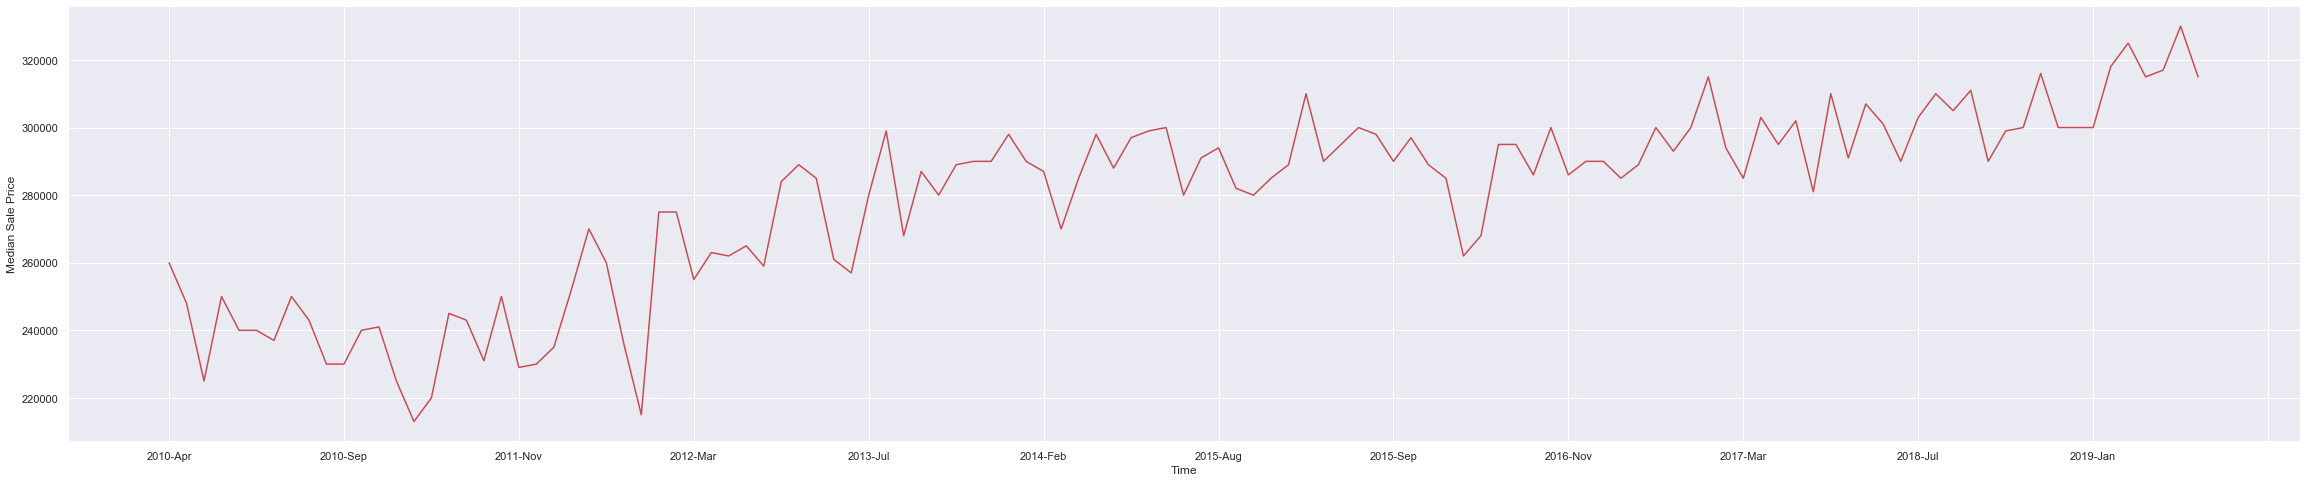

In [6]:
ax1 = sns.lineplot(x="Time", y="Median Sale Price", color = 'r', data = df)
sns.set(rc={'figure.figsize':(40,8)})
plt.xticks(range(0, 130, 10))
plt.show()

Above -- In the graph above we can see a general upwards trend over time, indicating that this data is being influenced by time and maybe should be treated as time series data.

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

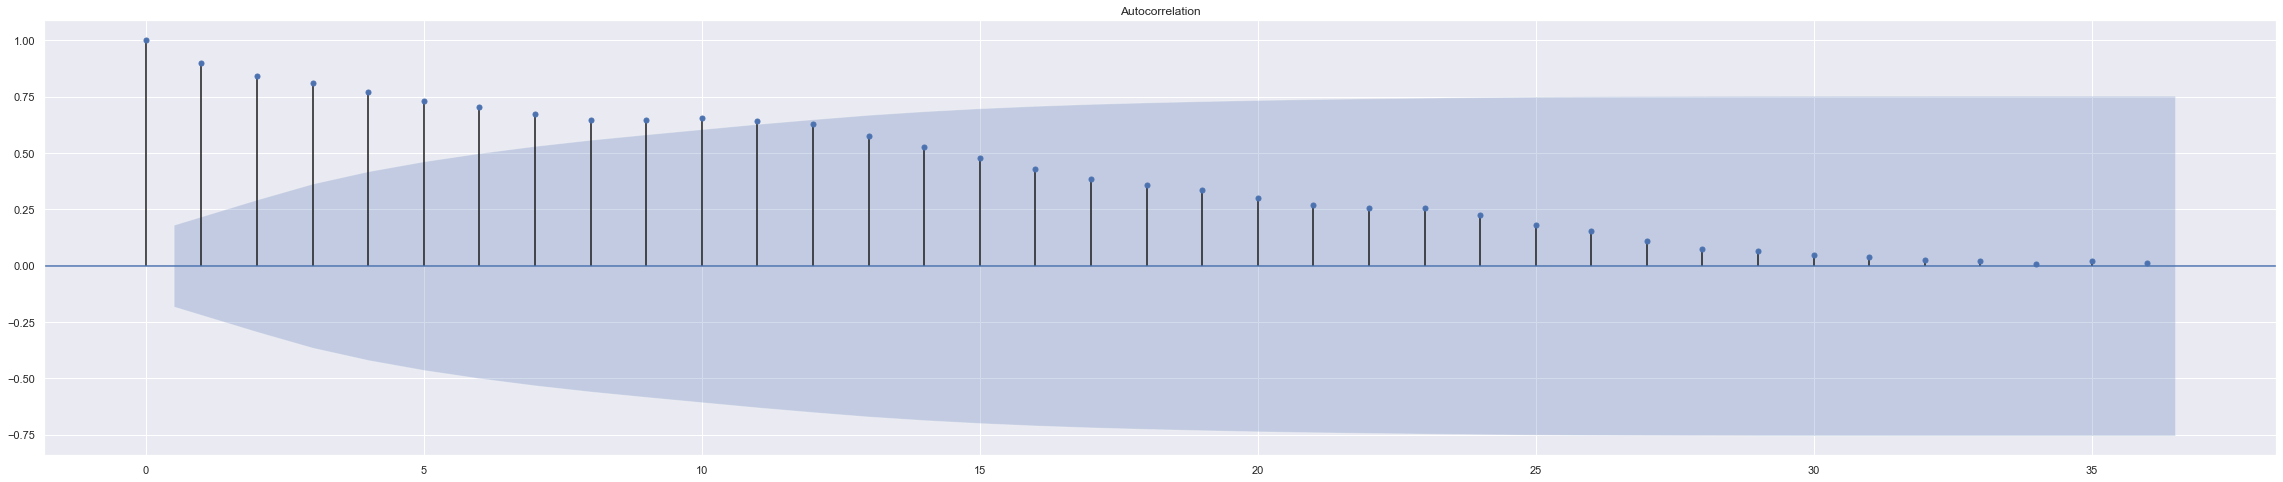

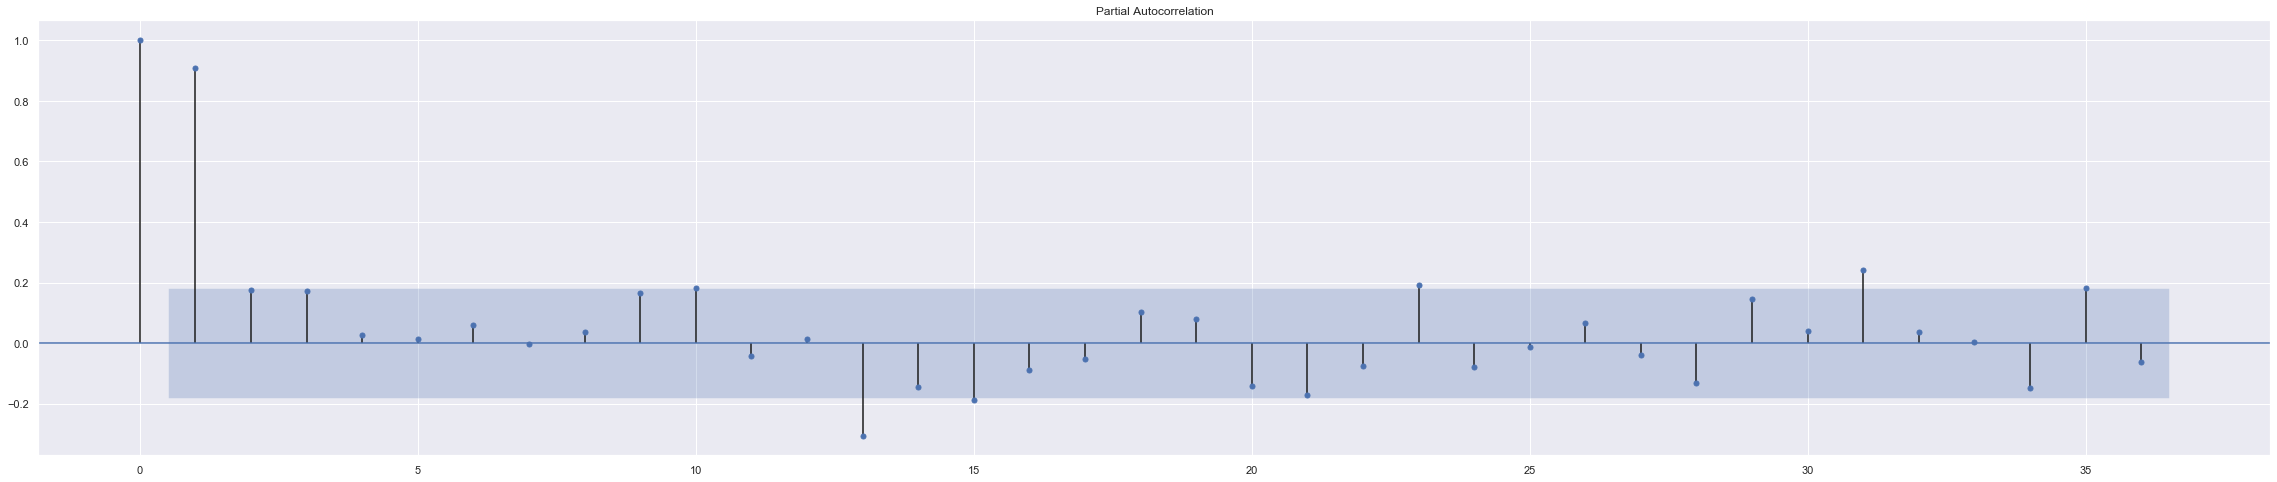

In [44]:
#plt.subplot(2, 1, 1)
plot_acf(df['Median Sale Price'], lags=36)

plot_pacf(df['Median Sale Price'], lags=36)

plt.show()

### 2) Which macro economic factors might help us to predict future DC median sale prices?

Visually we will be comparing our Median Sale Price data with various macro economic variables to see if there might be any sort of correlation or relationship between them. This process will help us to decide which of these potential independent variables, might be useful to include in our time series model.

#### Median Sale Price MoM

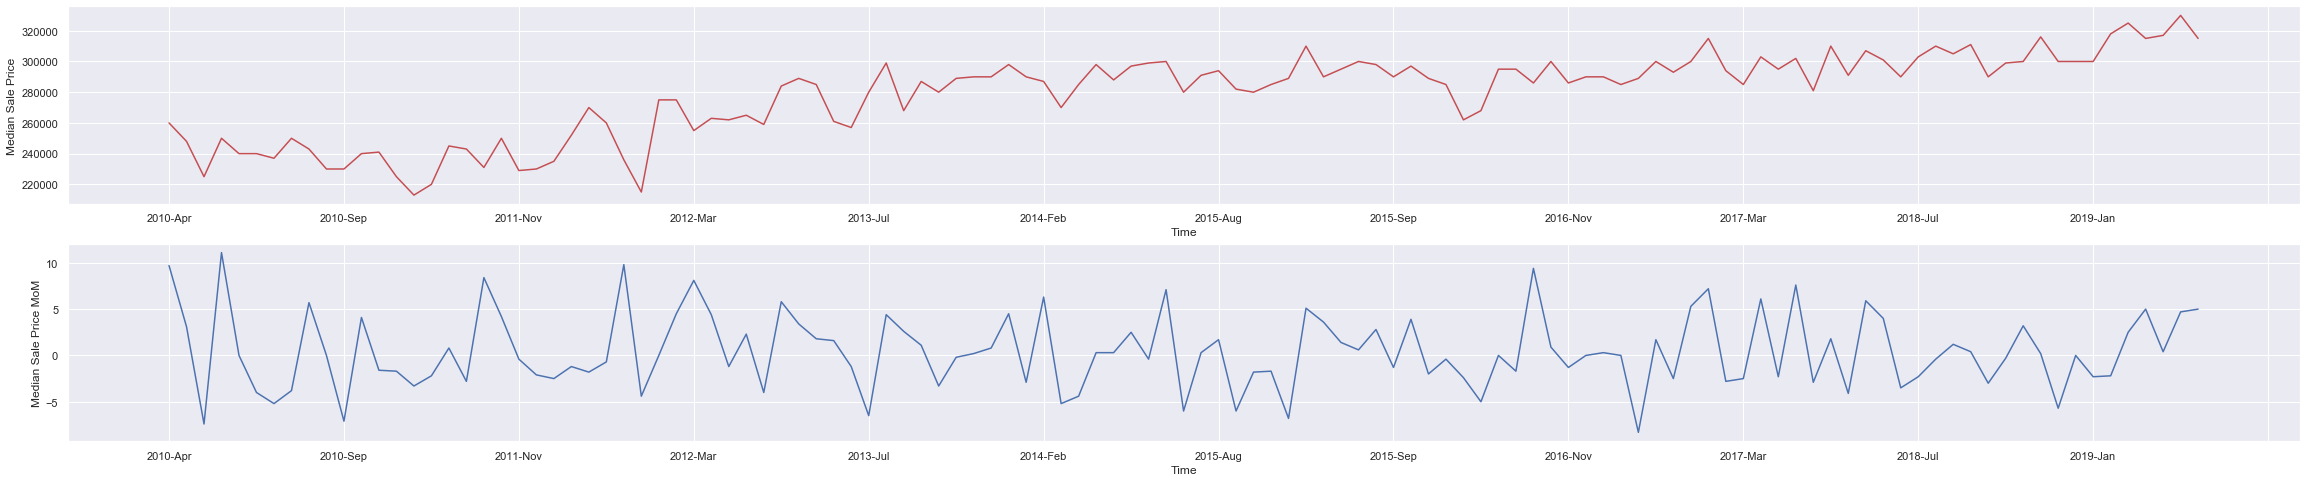

In [7]:
plt.subplot(2, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(2, 1, 2)
sns.lineplot(x = "Time", y = "Median Sale Price MoM", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,8)})
plt.show()

Above -- We see that there might be some relationship between the median sale price (red) and the percentage change MoM (month over month) of the median sales price (blue), as the peaks and valleys of the graph tend to correlate together.

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

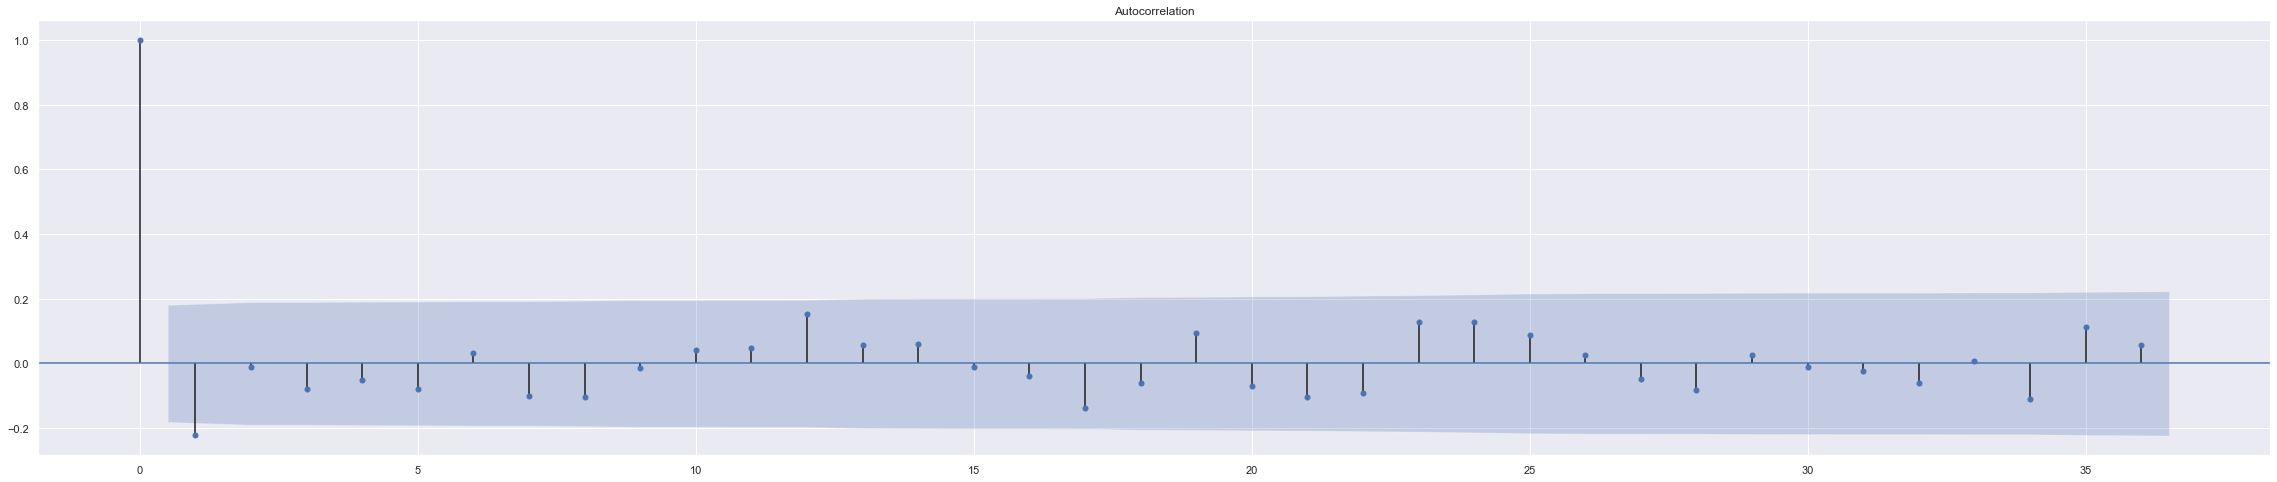

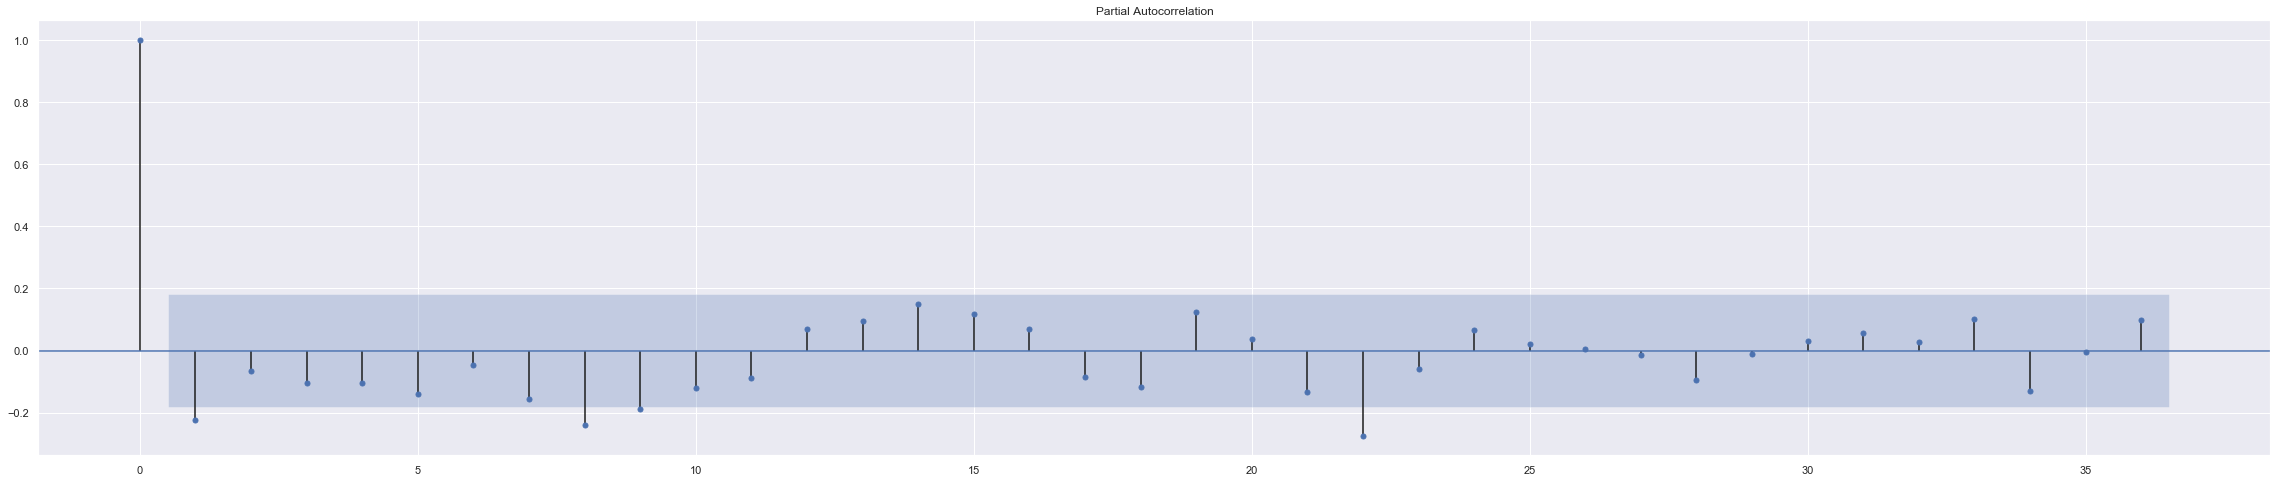

In [14]:
#plt.subplot(2, 1, 1)
plot_acf(df["Median Sale Price MoM"], lags=36)
plot_pacf(df["Median Sale Price MoM"], lags=36)

plt.show()

#### New Listings

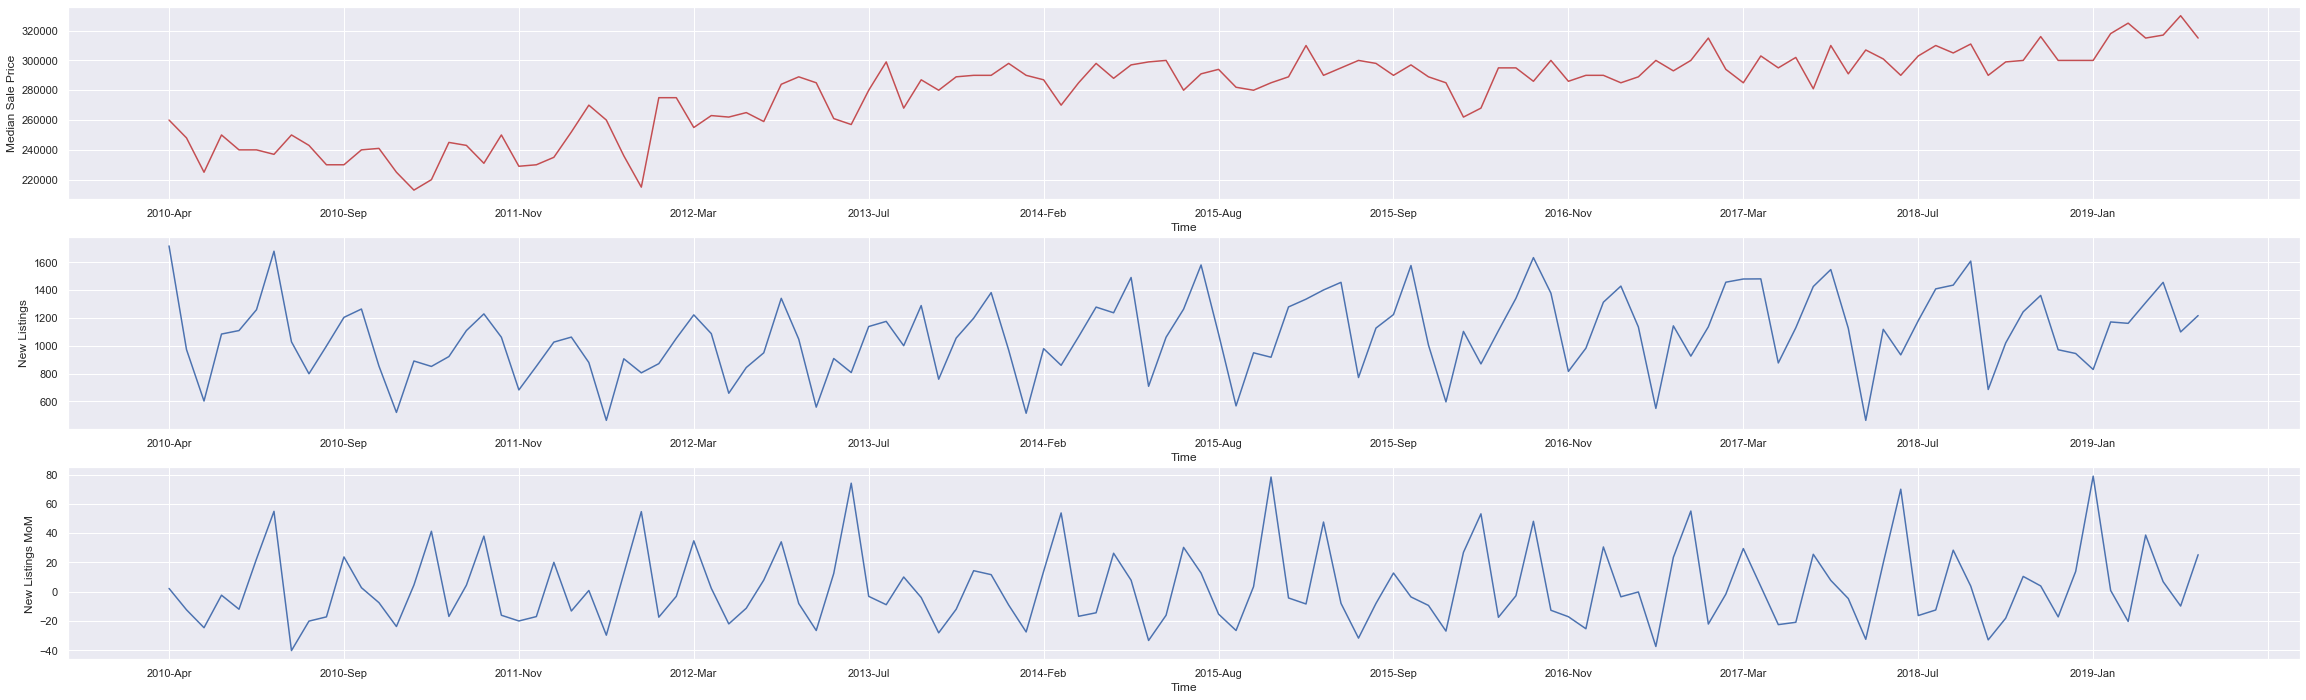

In [33]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "New Listings", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "New Listings MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,10)})
plt.show()

Above -- This time we are looking at the total numbers of new listings, and the percentage change MoM of new listings over time. 

It appears that there might be an inverse relationship between New Listings and Median Sale Price. Perhaps their is a sligth time lag.

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

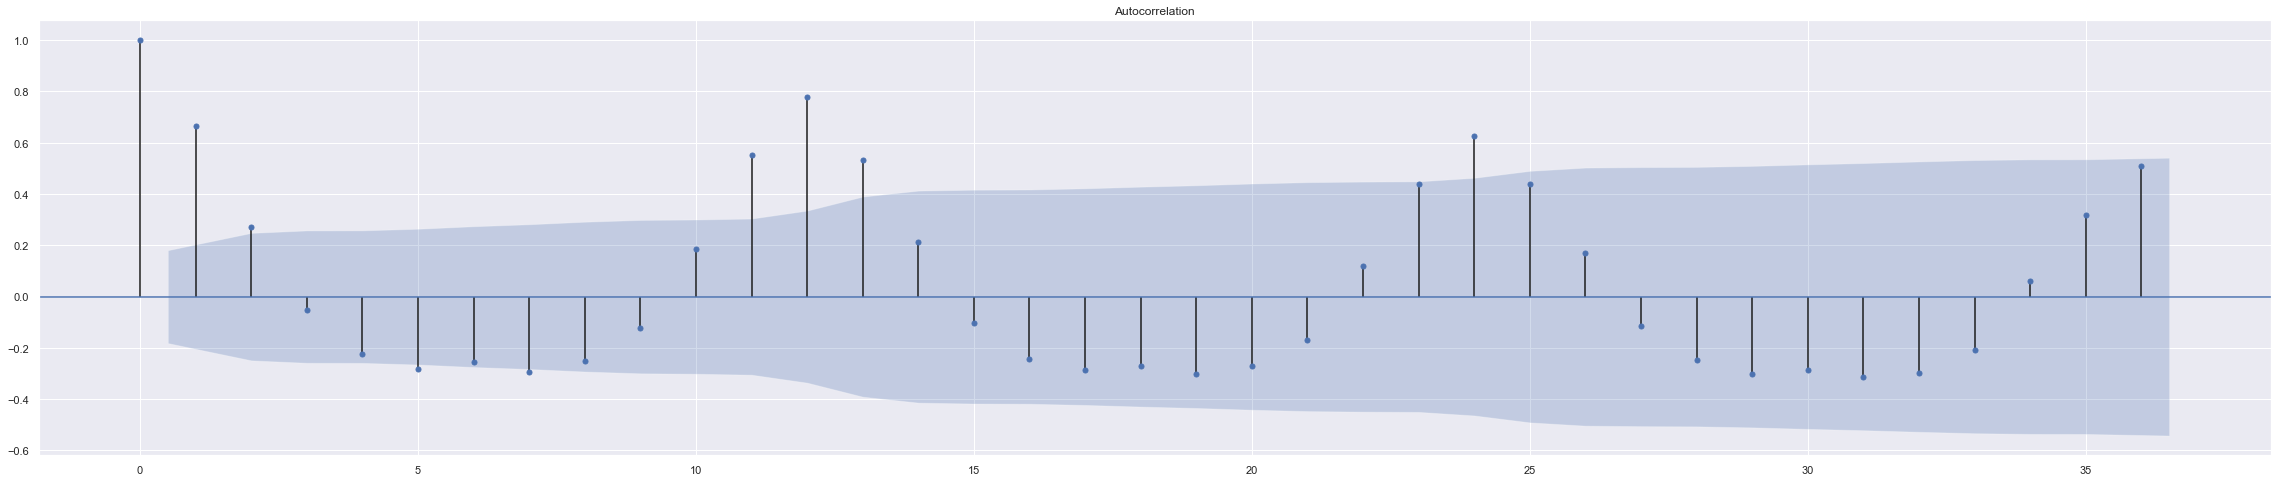

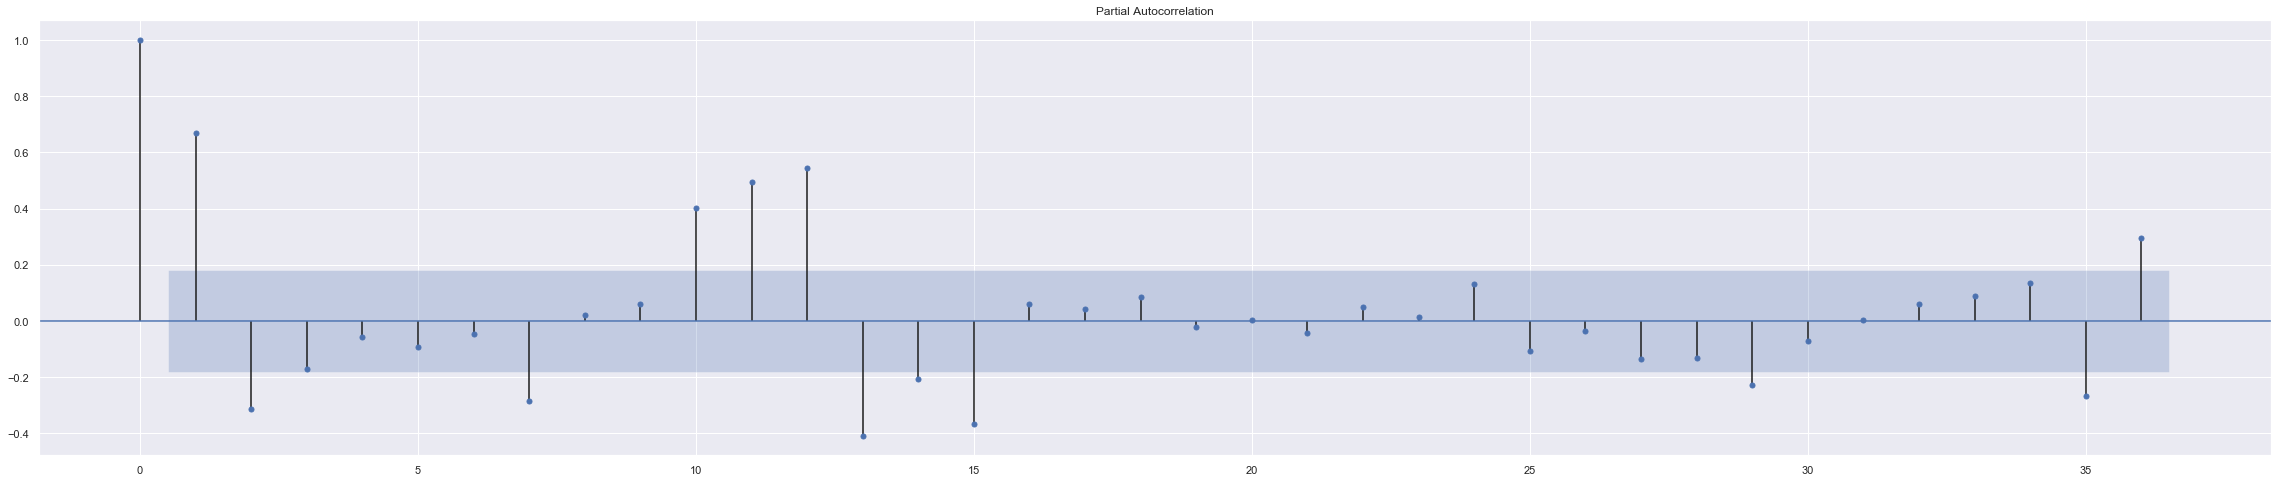

In [45]:
#plt.subplot(2, 1, 1)
plot_acf(df["New Listings"], lags=36)
plot_pacf(df["New Listings"], lags=36)

plt.show()

/Users/jillcarrie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


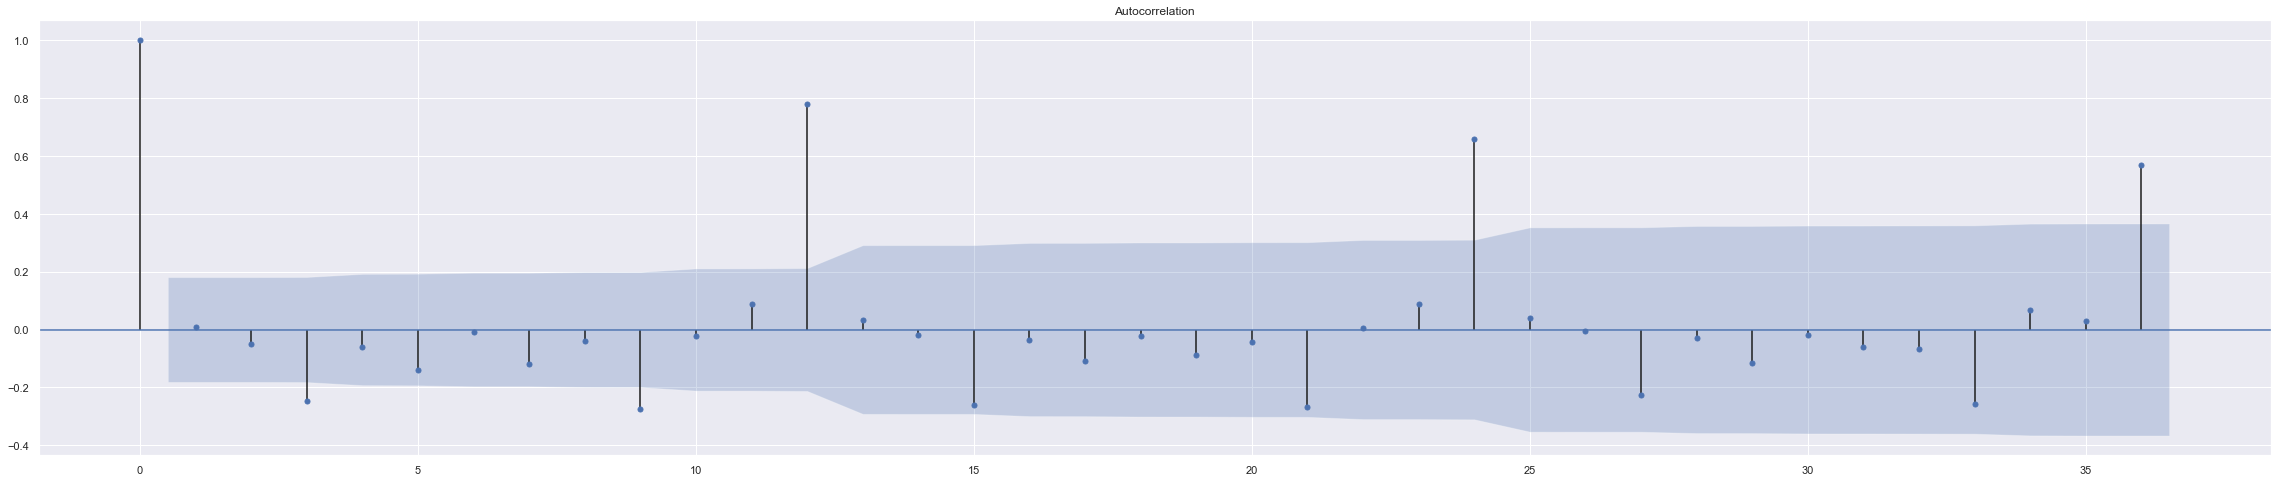

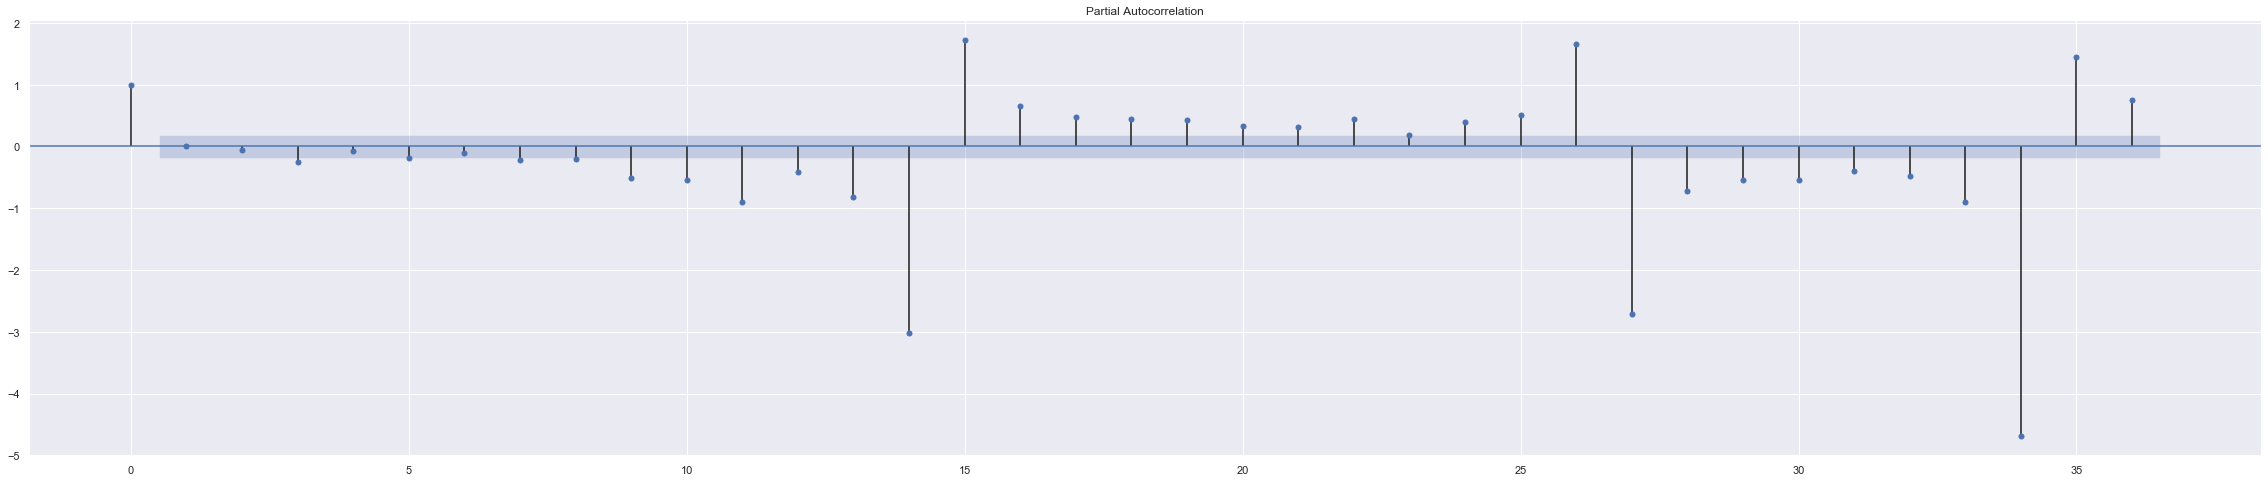

In [46]:
#plt.subplot(2, 1, 1)
plot_acf(df["New Listings MoM"], lags=36)
plot_pacf(df["New Listings MoM"], lags=36)

plt.show()

#### Homes Sold

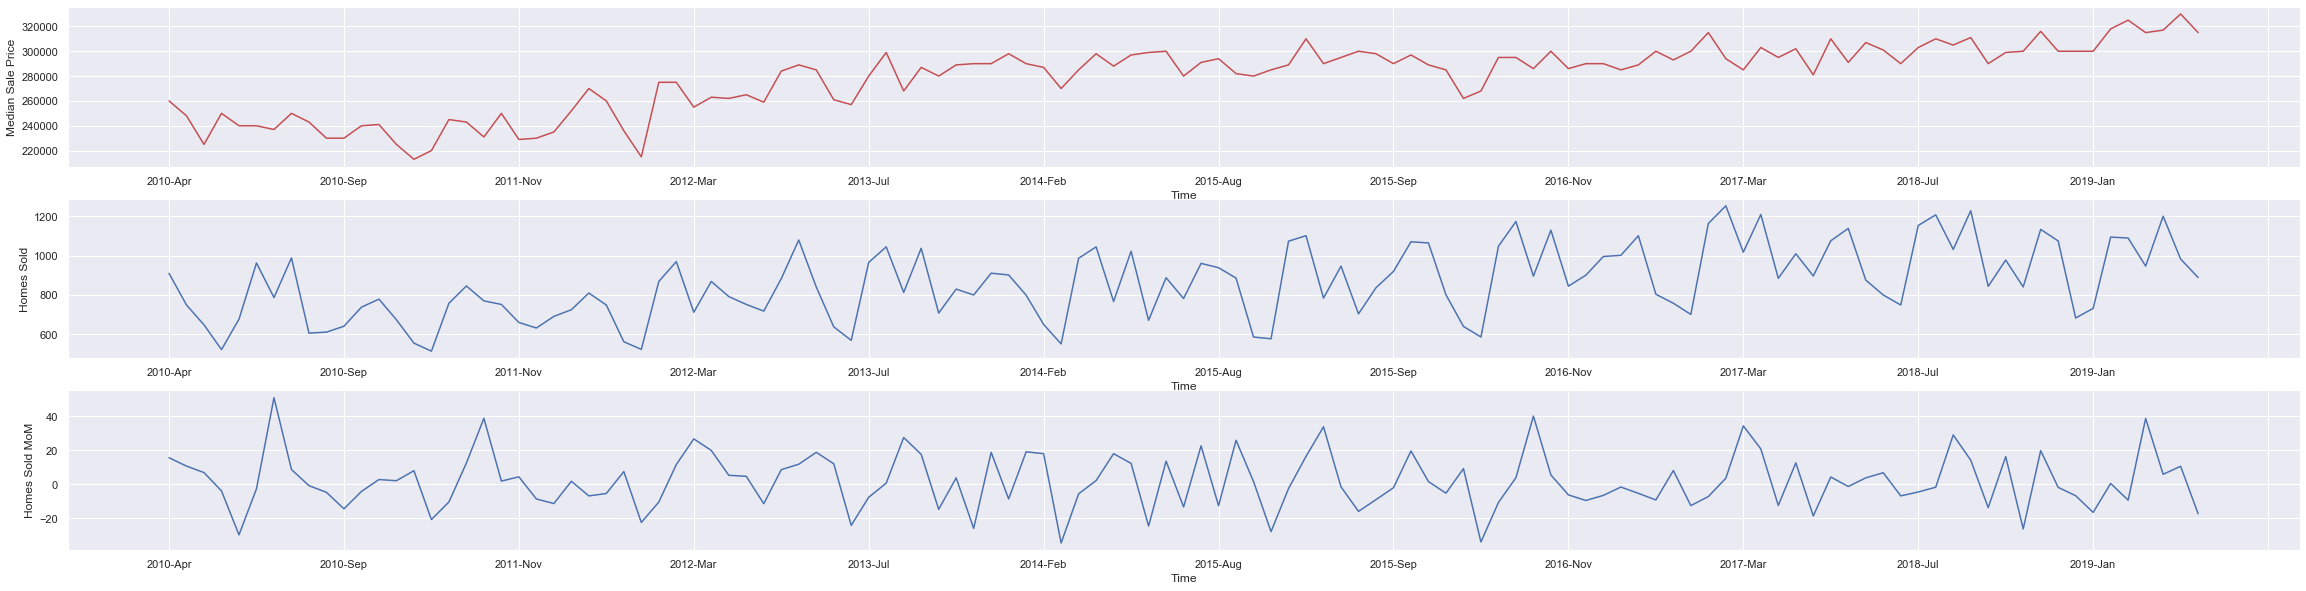

In [34]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Homes Sold", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Homes Sold MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,10)})
plt.show()

Above -- This time we are looking at the total numbers of homes sold, and the percentage change MoM of homes sold over time. 

There appears to be a pretty clear relationship between both the volume of homes sold and the MoM percentage of homes sold with our Median Sale Price. 

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

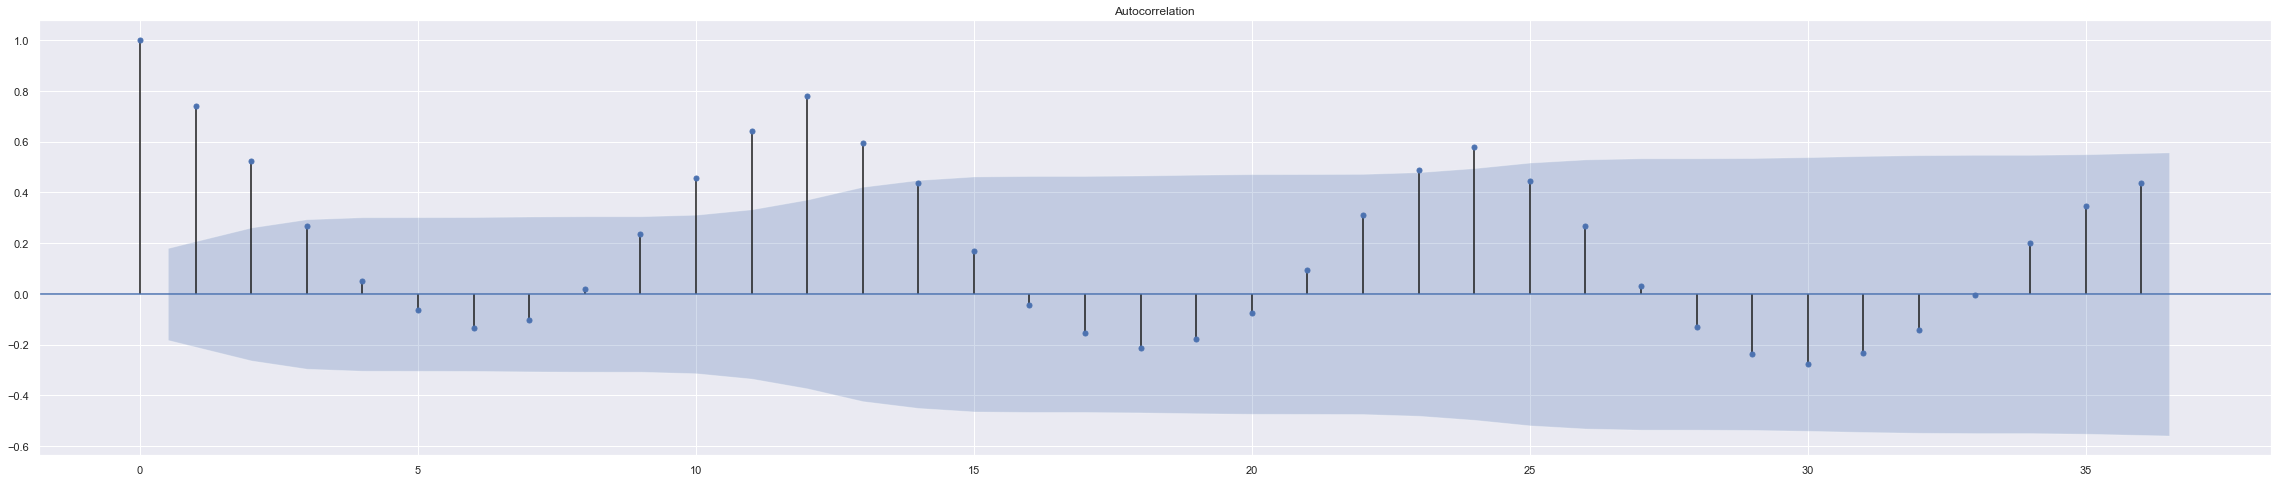

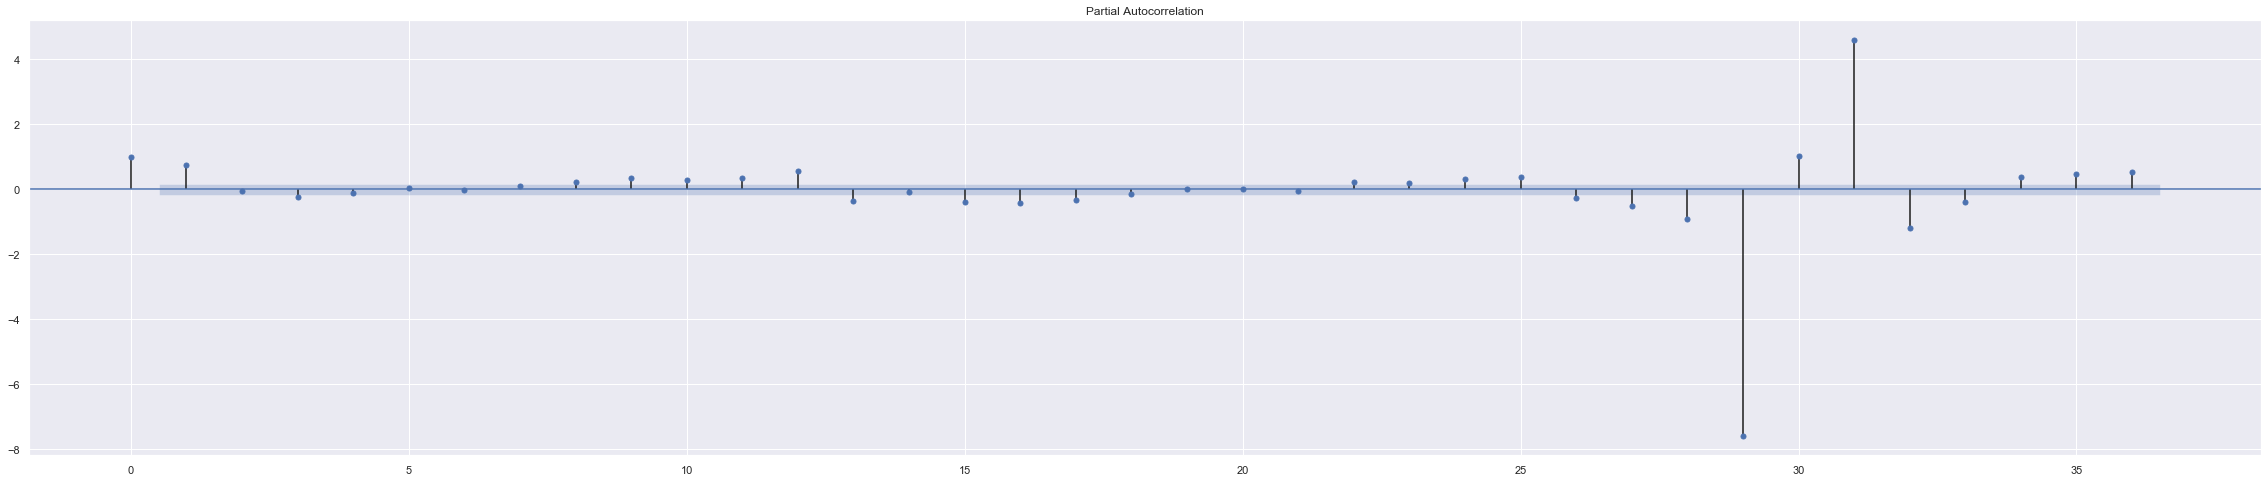

In [50]:
#plt.subplot(2, 1, 1)
plot_acf(df["Homes Sold"], lags=36)
plot_pacf(df["Homes Sold"], lags=36)

plt.show()

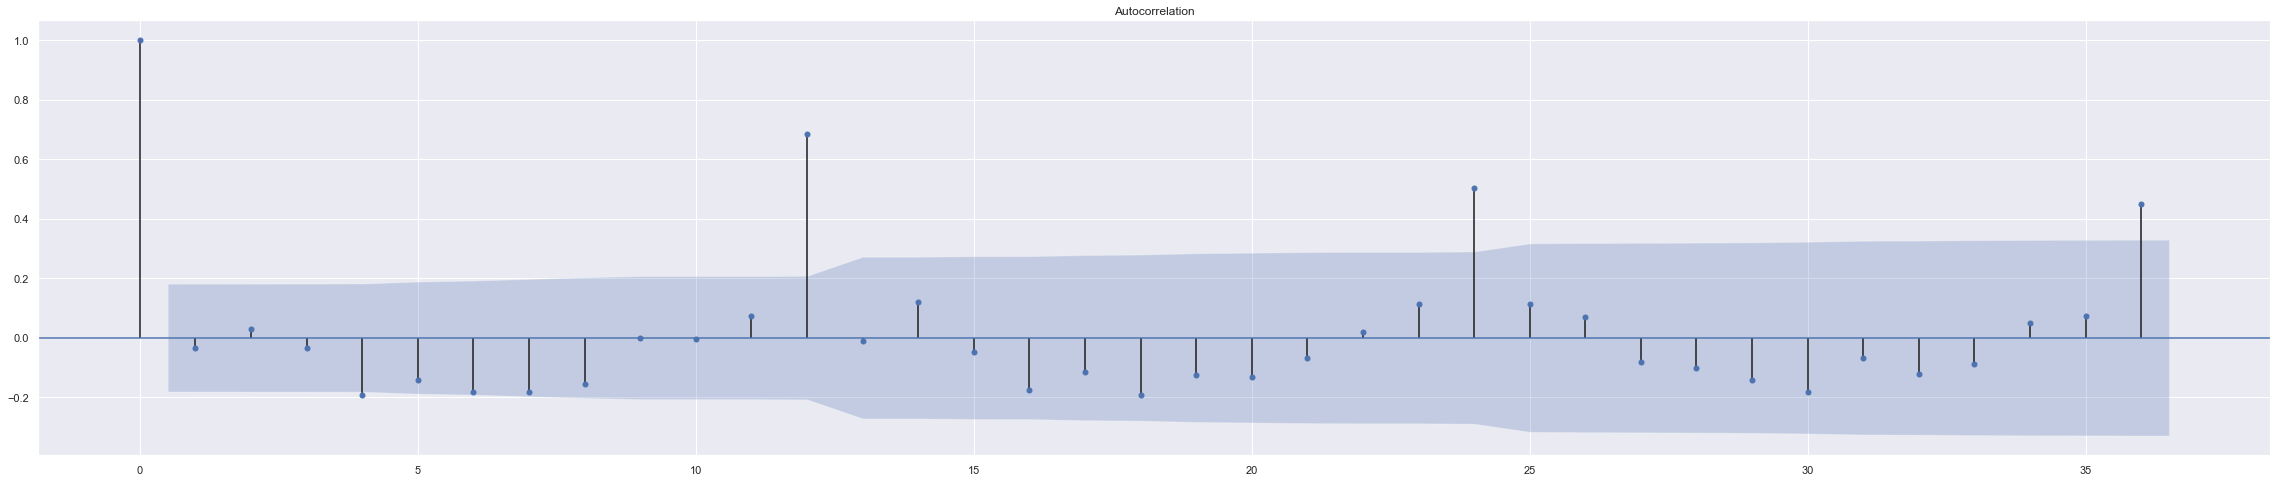

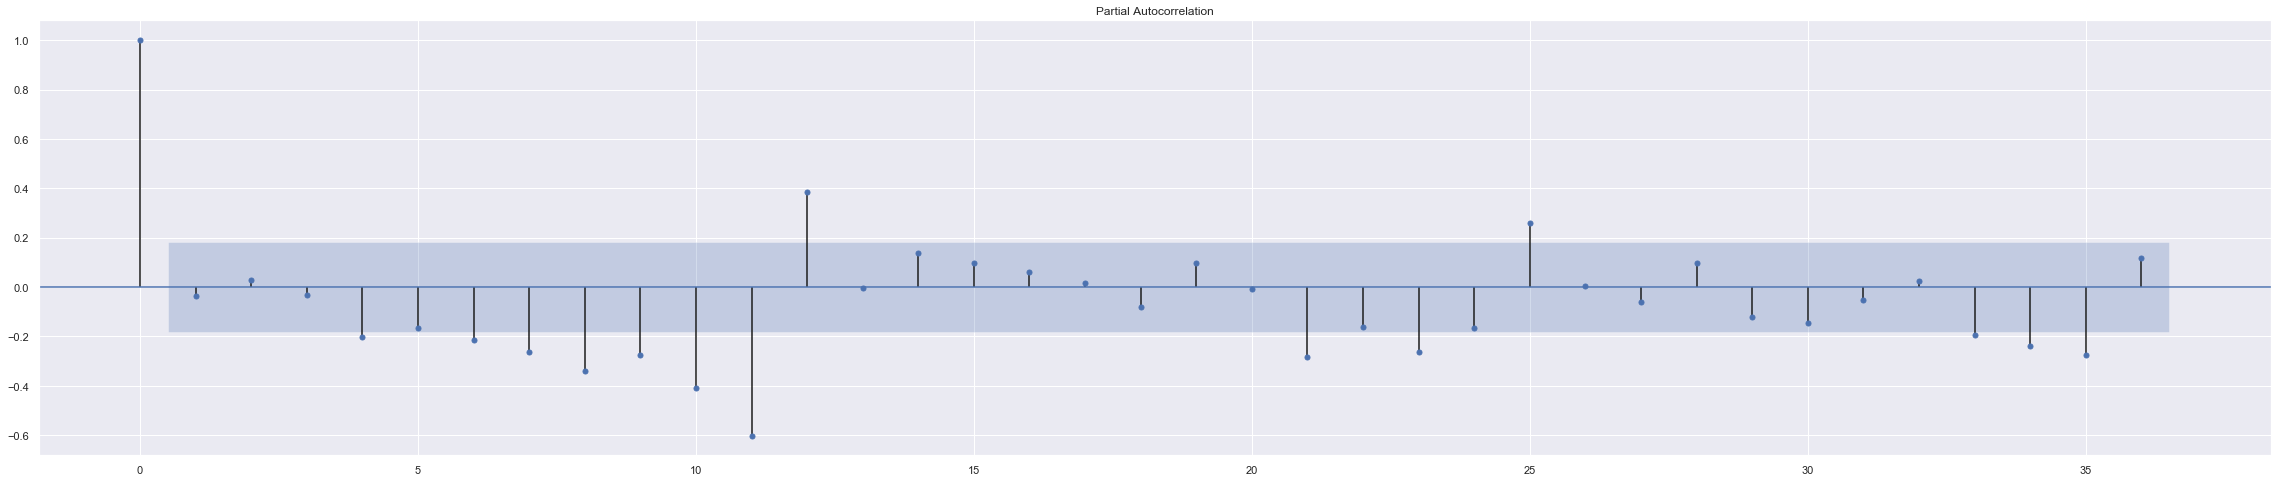

In [51]:
#plt.subplot(2, 1, 1)
plot_acf(df["Homes Sold MoM"], lags=36)
plot_pacf(df["Homes Sold MoM"], lags=36)

plt.show()

#### Total Number of Homes Available

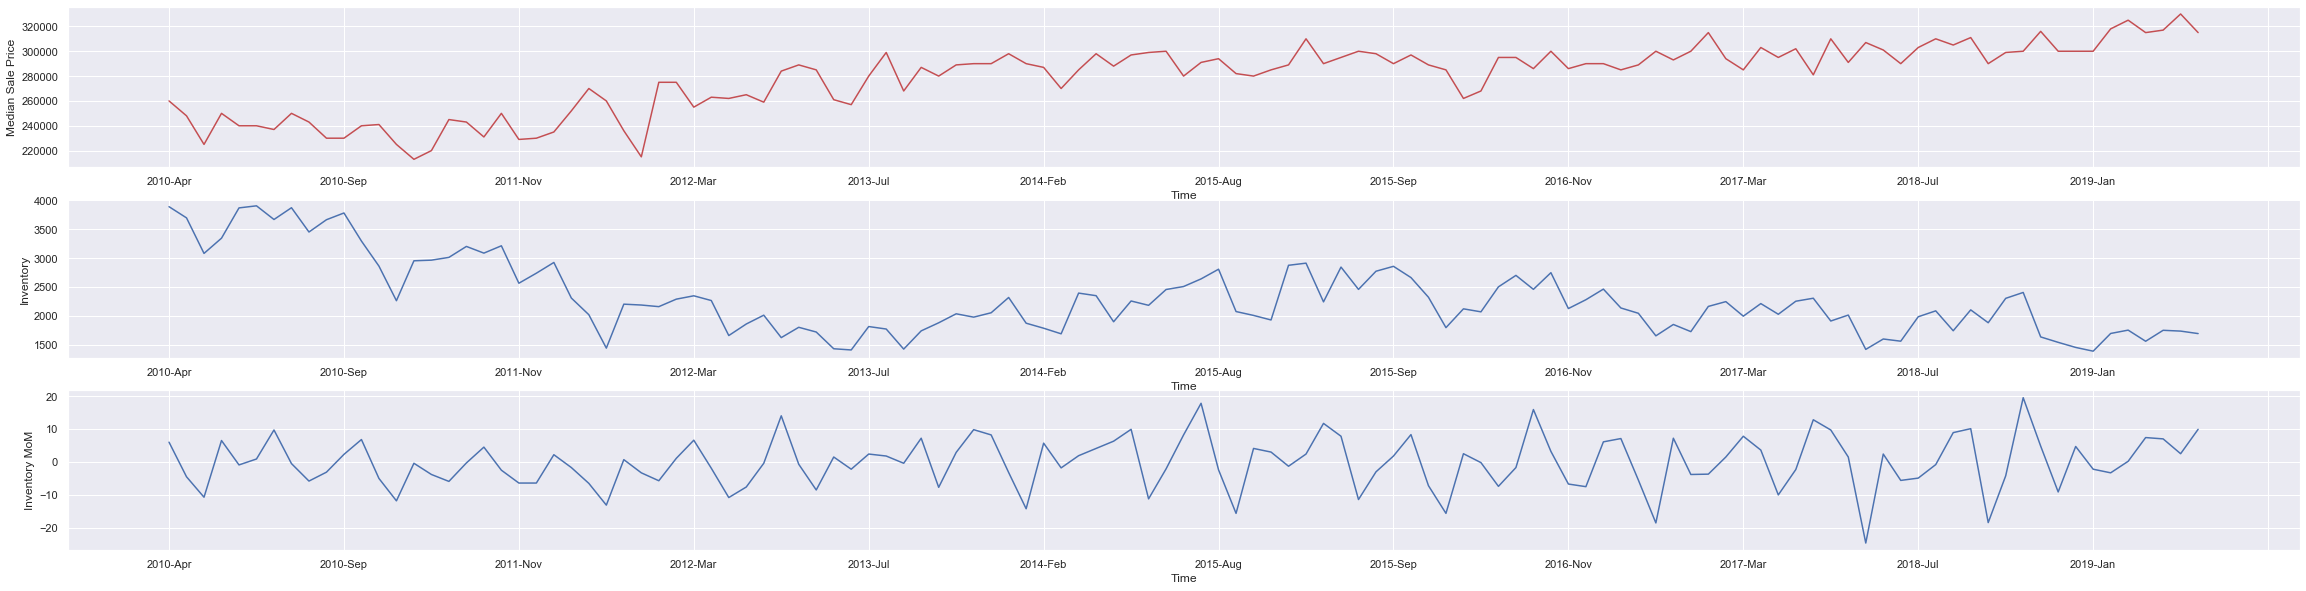

In [35]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Inventory", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Inventory MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,10)})
plt.show()

Above -- This time we are looking at the total numbers of homes available on the market, and the percentage change MoM of homes available over time. 

It appears that there might be an inverse relationship between Total Listings and percentage change in total listings MoM, with our Median Sale Price. Perhaps their is a sligth time lag.

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

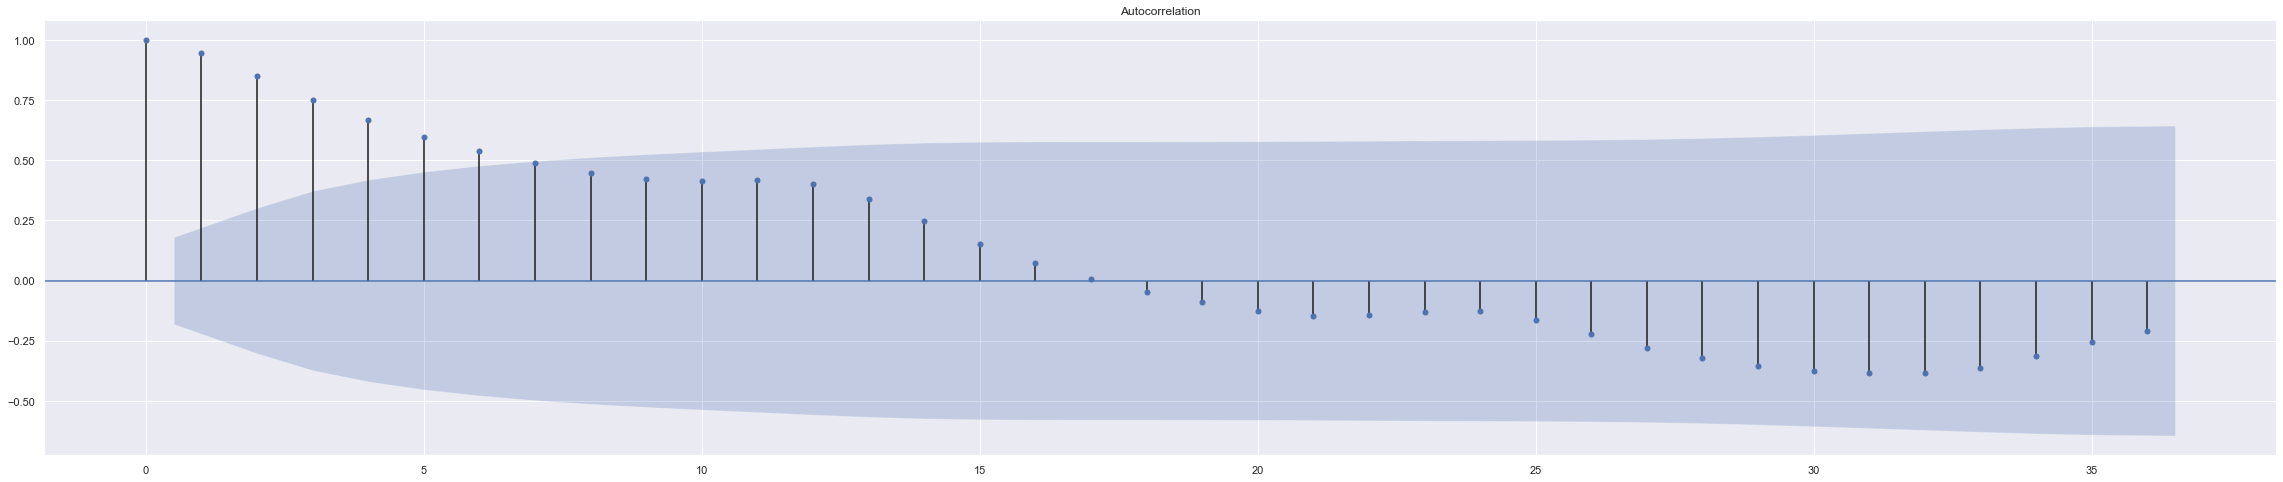

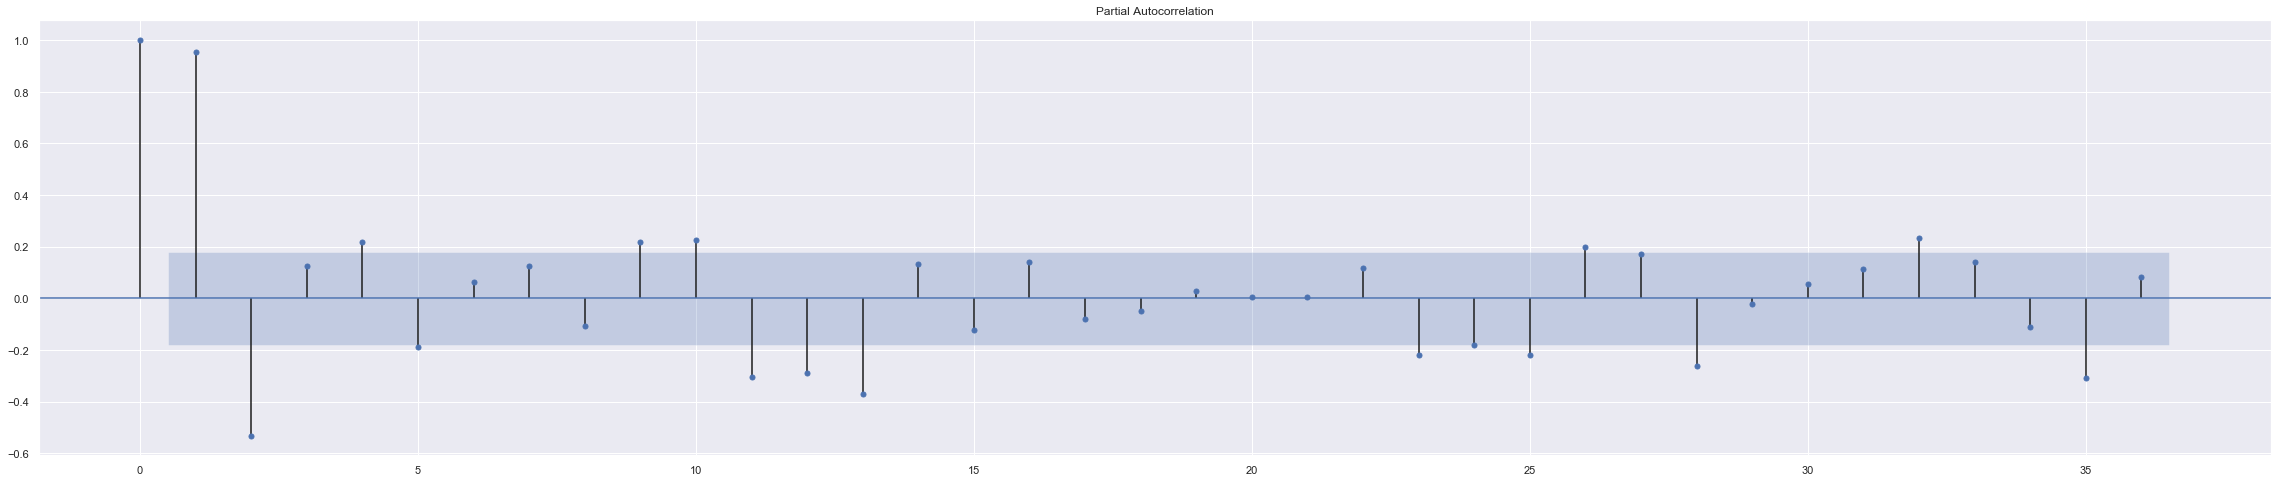

In [53]:
#plt.subplot(2, 1, 1)
plot_acf(df["Inventory"], lags=36)
plot_pacf(df["Inventory"], lags=36)

plt.show()

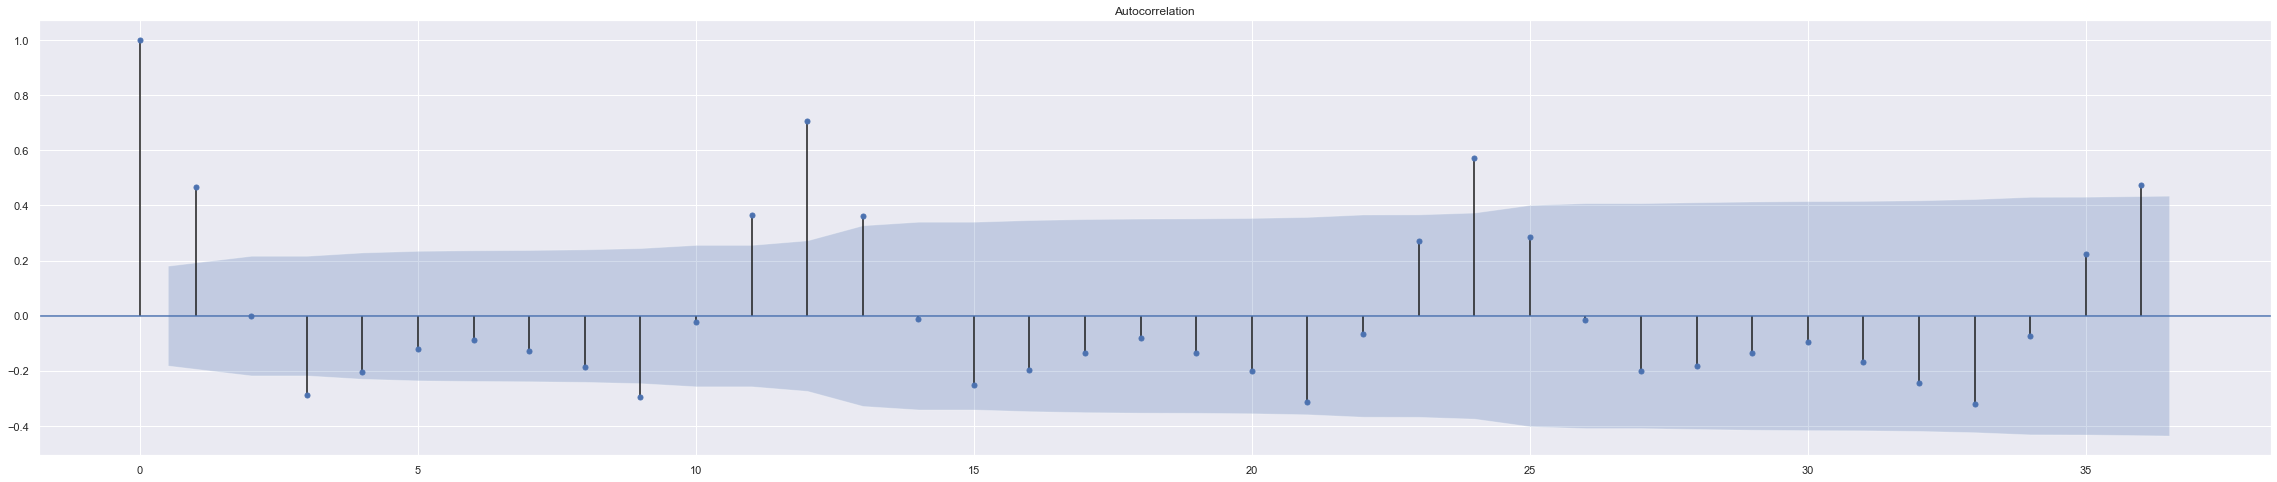

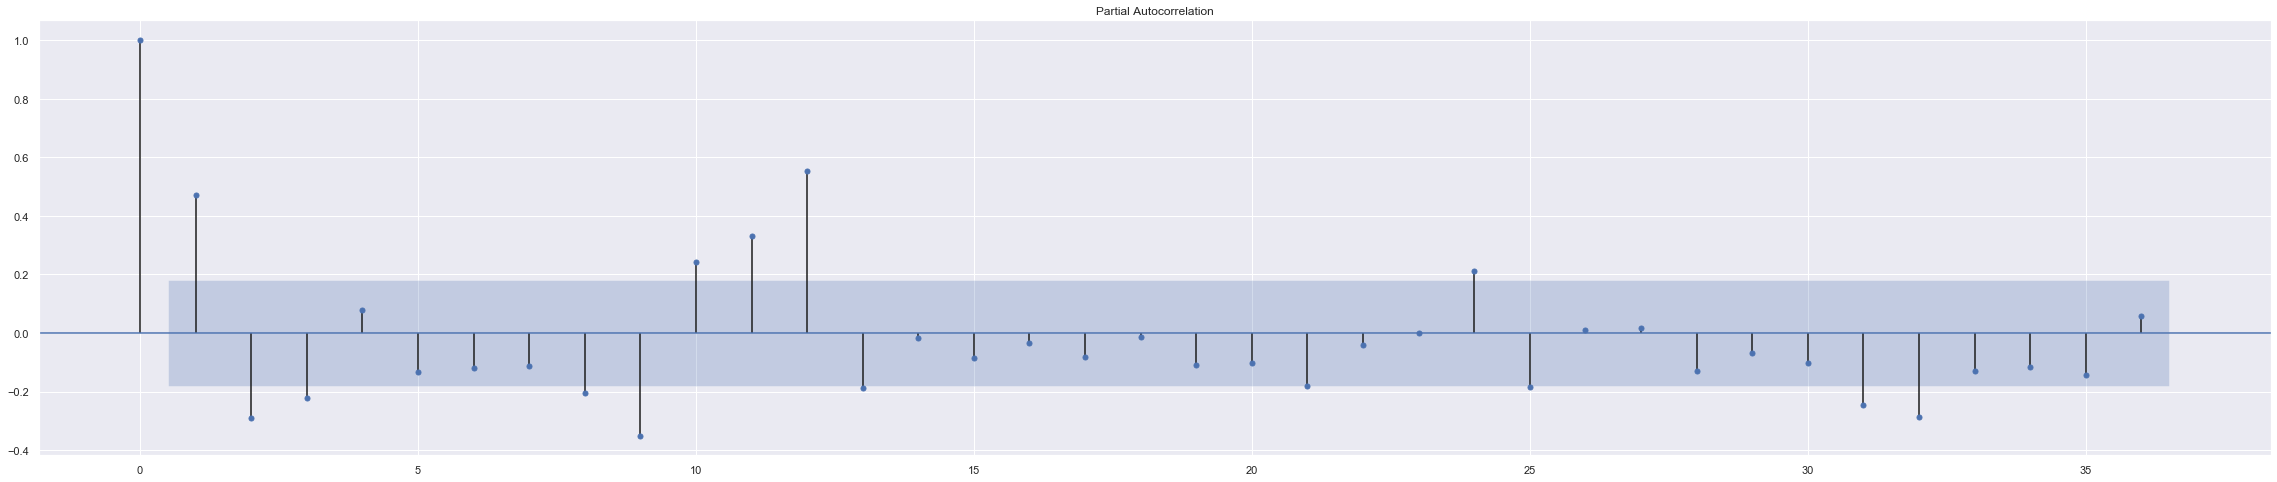

In [52]:
#plt.subplot(2, 1, 1)
plot_acf(df["Inventory MoM"], lags=36)
plot_pacf(df["Inventory MoM"], lags=36)

plt.show()

#### Average Number of Days on the Market

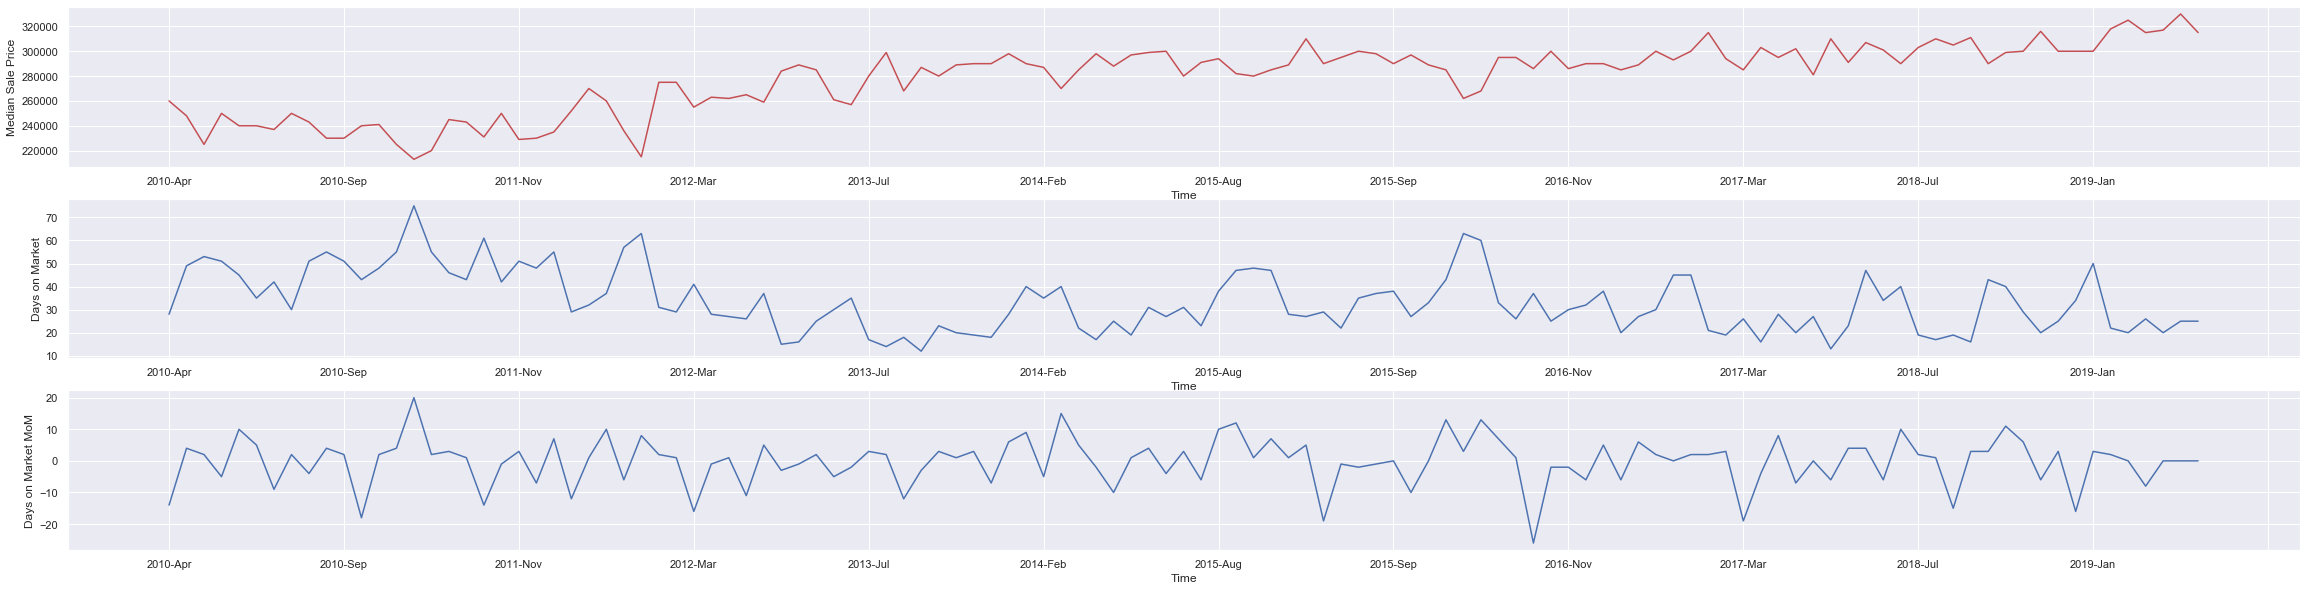

In [36]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Days on Market", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Days on Market MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,10)})
plt.show()

Above -- Here we are looking at the average number of days homes have been available on the market, and the percentage change MoM of homes available over time. 

It appears that there might be an inverse relationship between days on the market and percentage change in days on the marker MoM, with our Median Sale Price. 

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

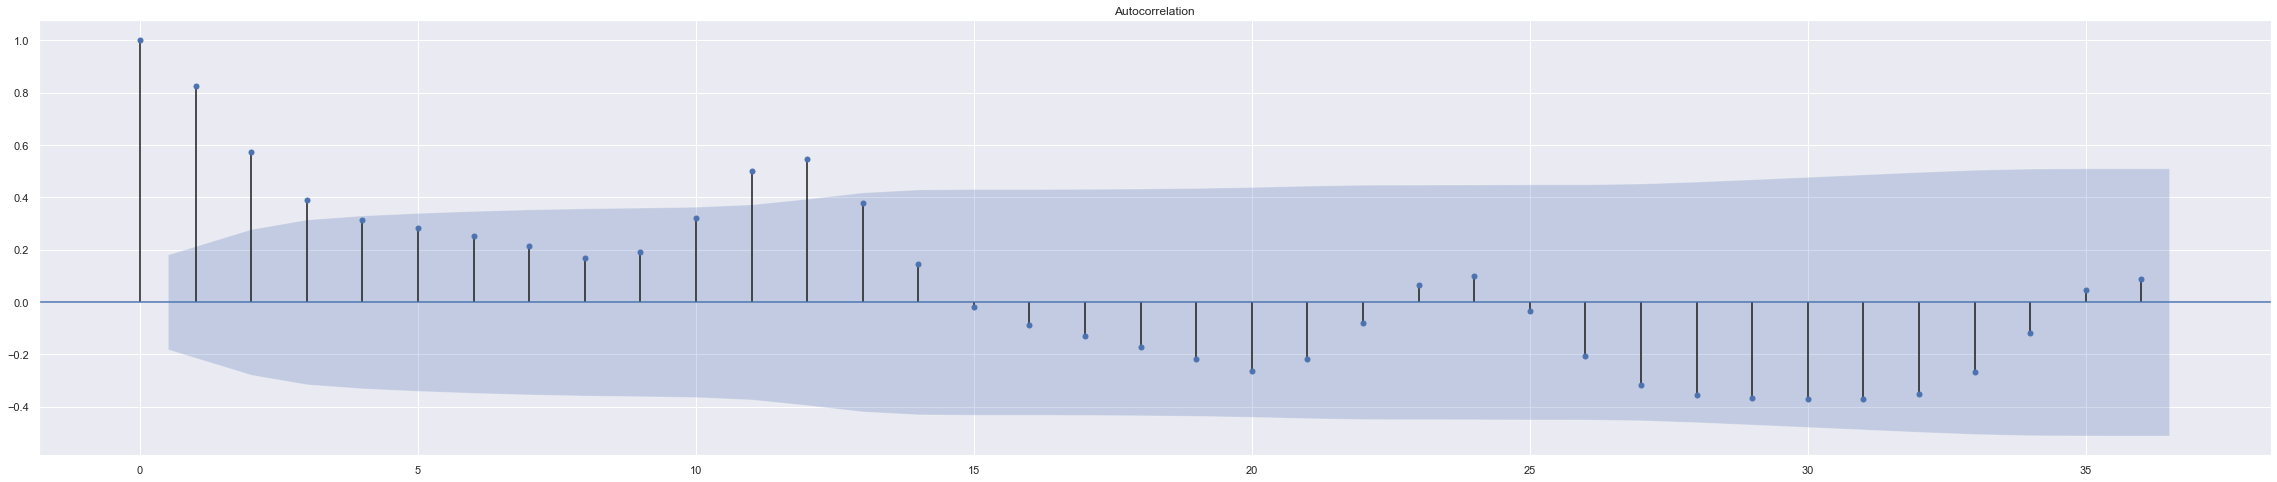

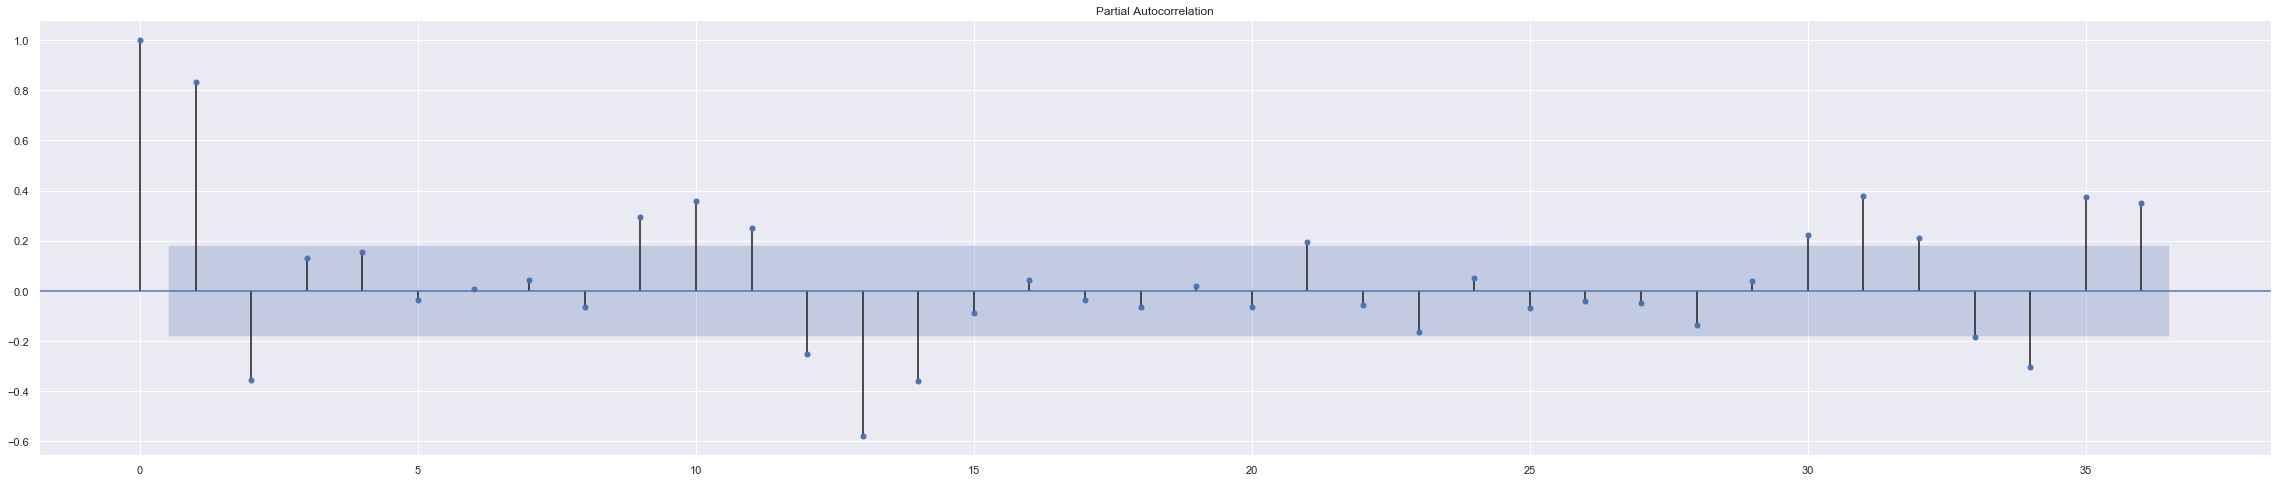

In [54]:
#plt.subplot(2, 1, 1)
plot_acf(df["Days on Market"], lags=36)
plot_pacf(df["Days on Market"], lags=36)

plt.show()

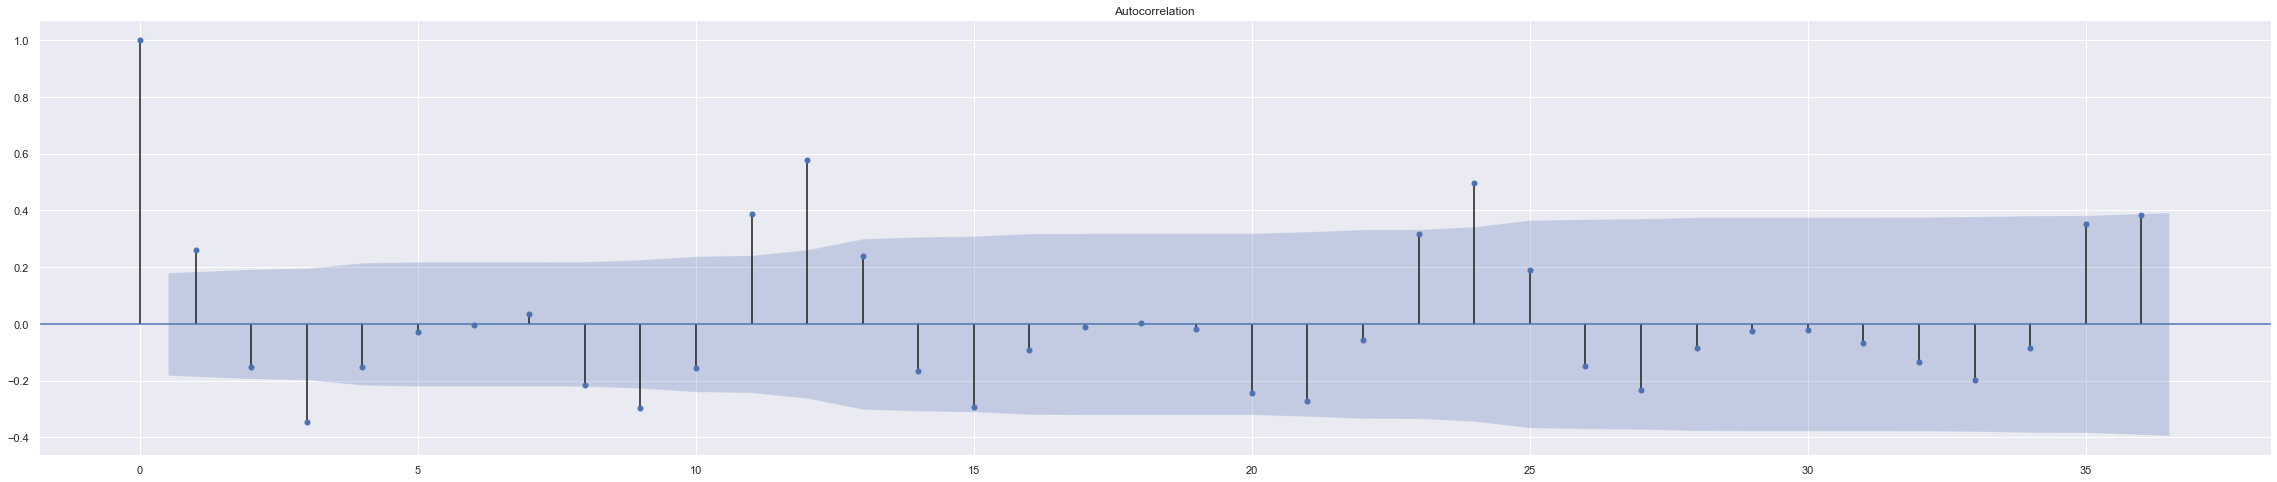

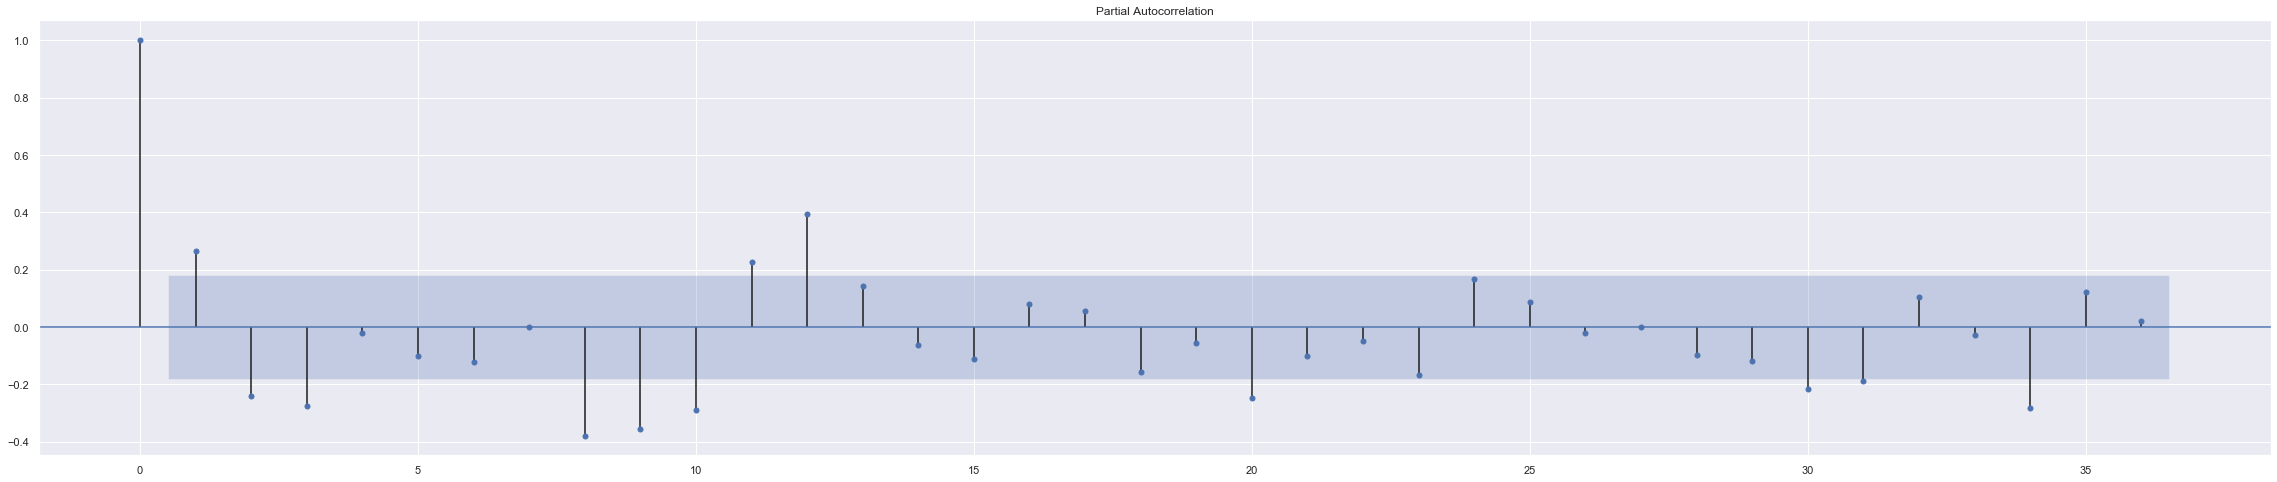

In [55]:
#plt.subplot(2, 1, 1)
plot_acf(df["Days on Market MoM"], lags=36)
plot_pacf(df["Days on Market MoM"], lags=36)

plt.show()

#### Average % Difference between Sale and List Price

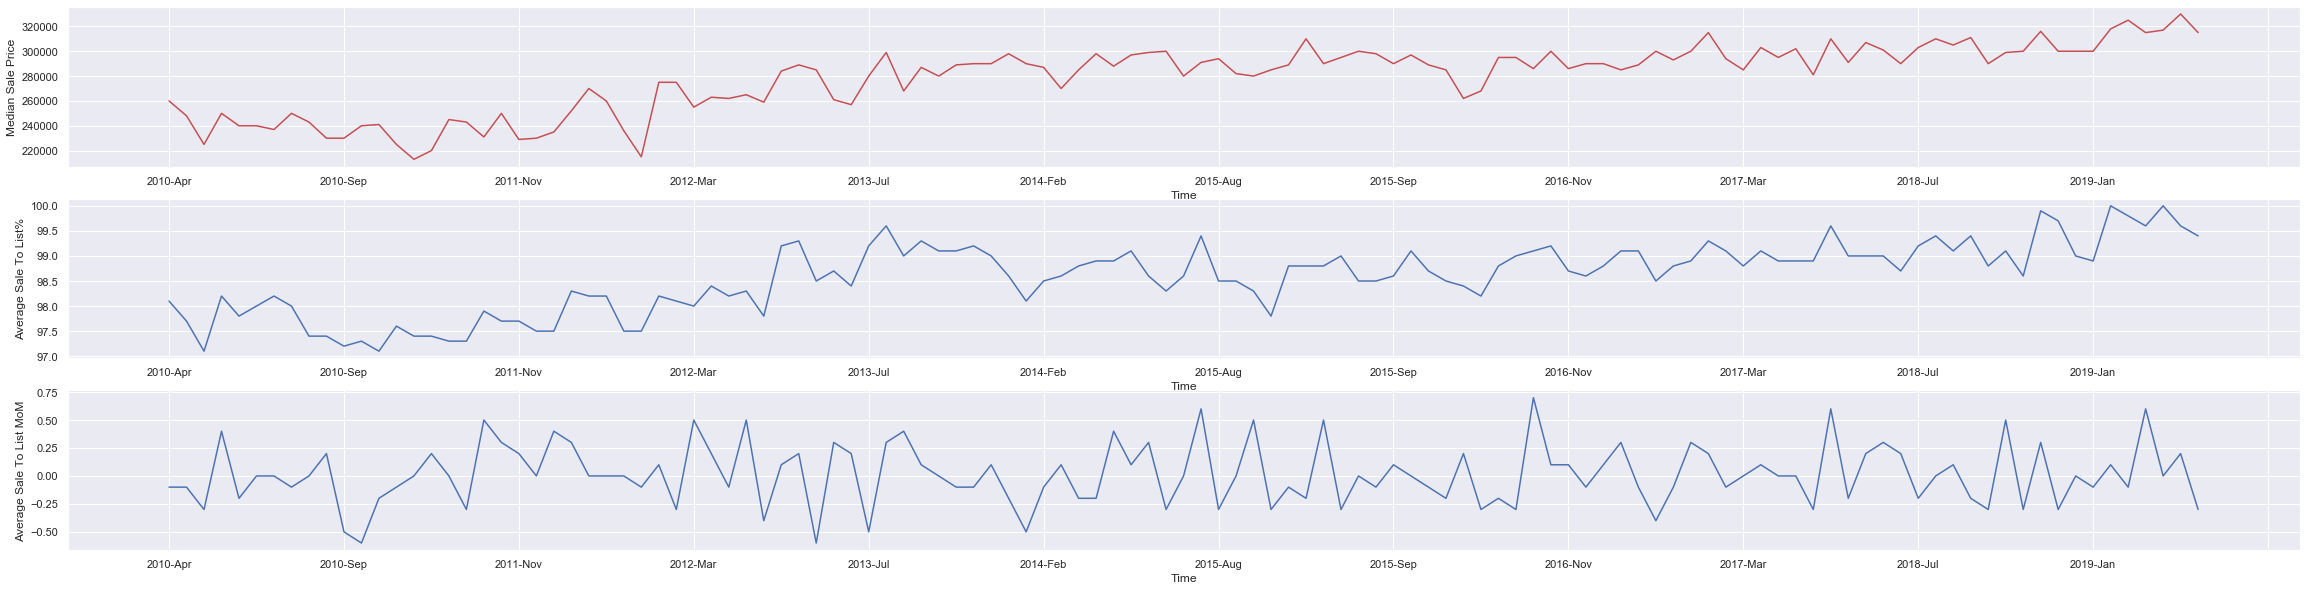

In [37]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Average Sale To List%", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Average Sale To List MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,10)})
plt.show()

Above -- Here we are looking at the average percentage difference between the Listing Price (asking price) and the Sale Price (the amount the home actually sold for) and the percentage change MoM of this same metric.

It appears that there might be an direct correlation between these variables and our Median Sale Price. 

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

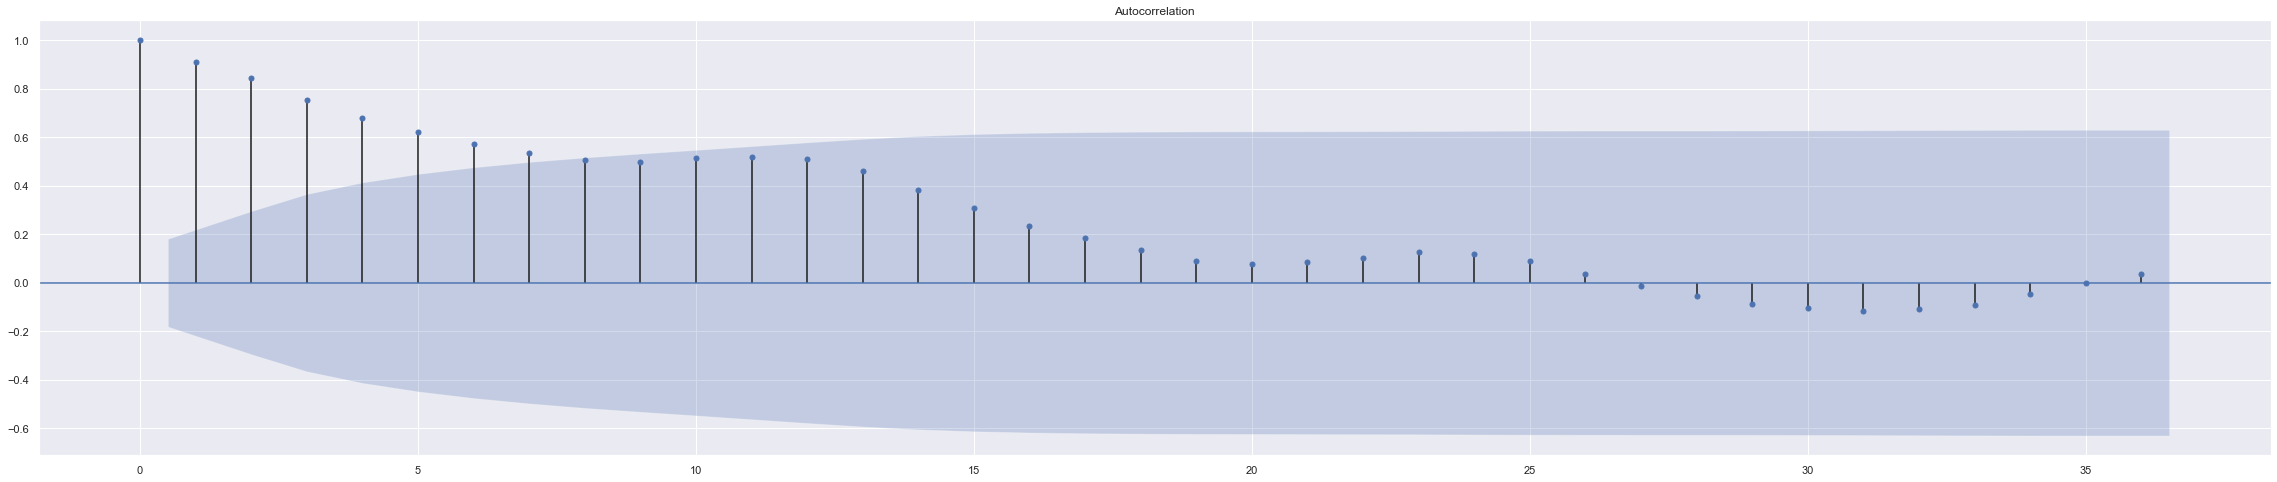

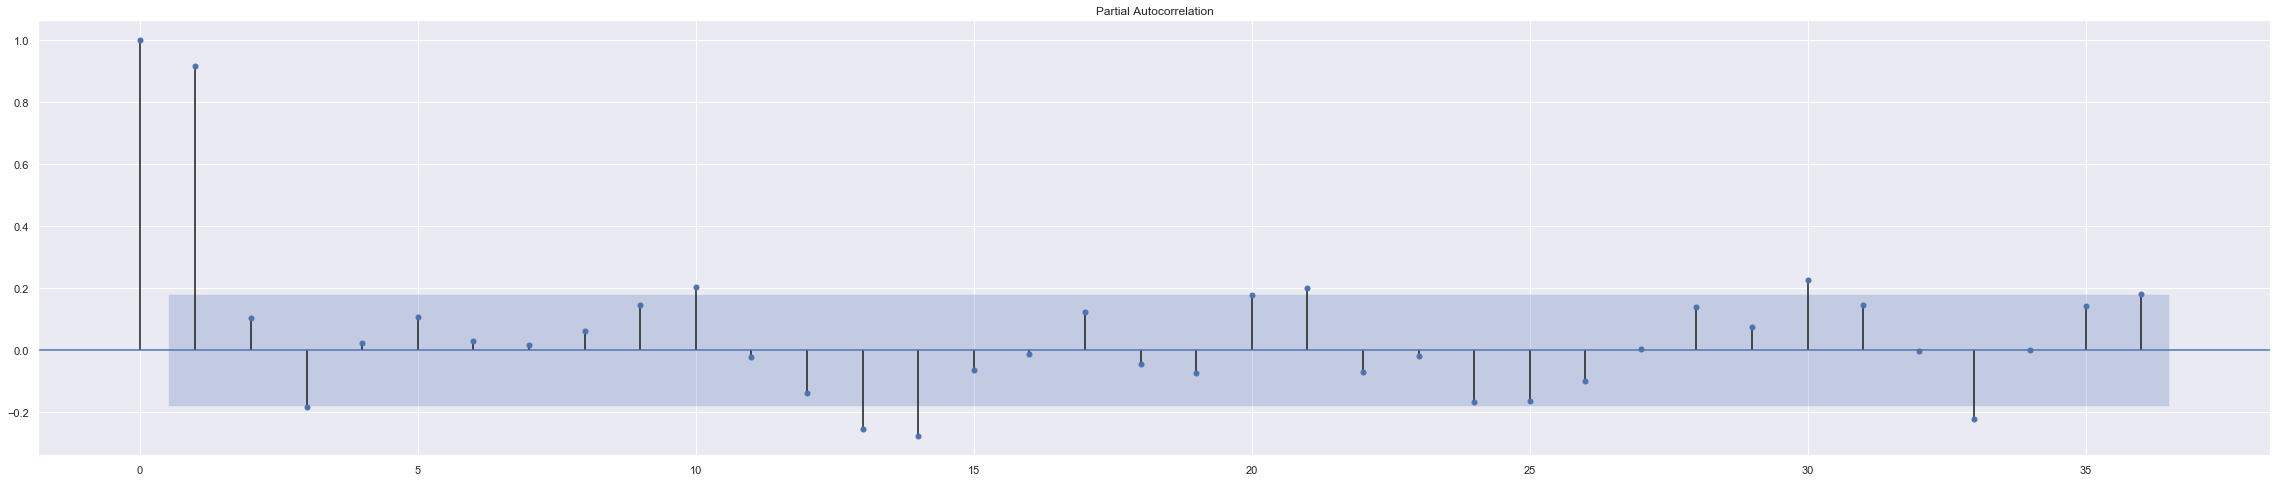

In [56]:
#plt.subplot(2, 1, 1)
plot_acf(df["Average Sale To List%"], lags=36)
plot_pacf(df["Average Sale To List%"], lags=36)

plt.show()

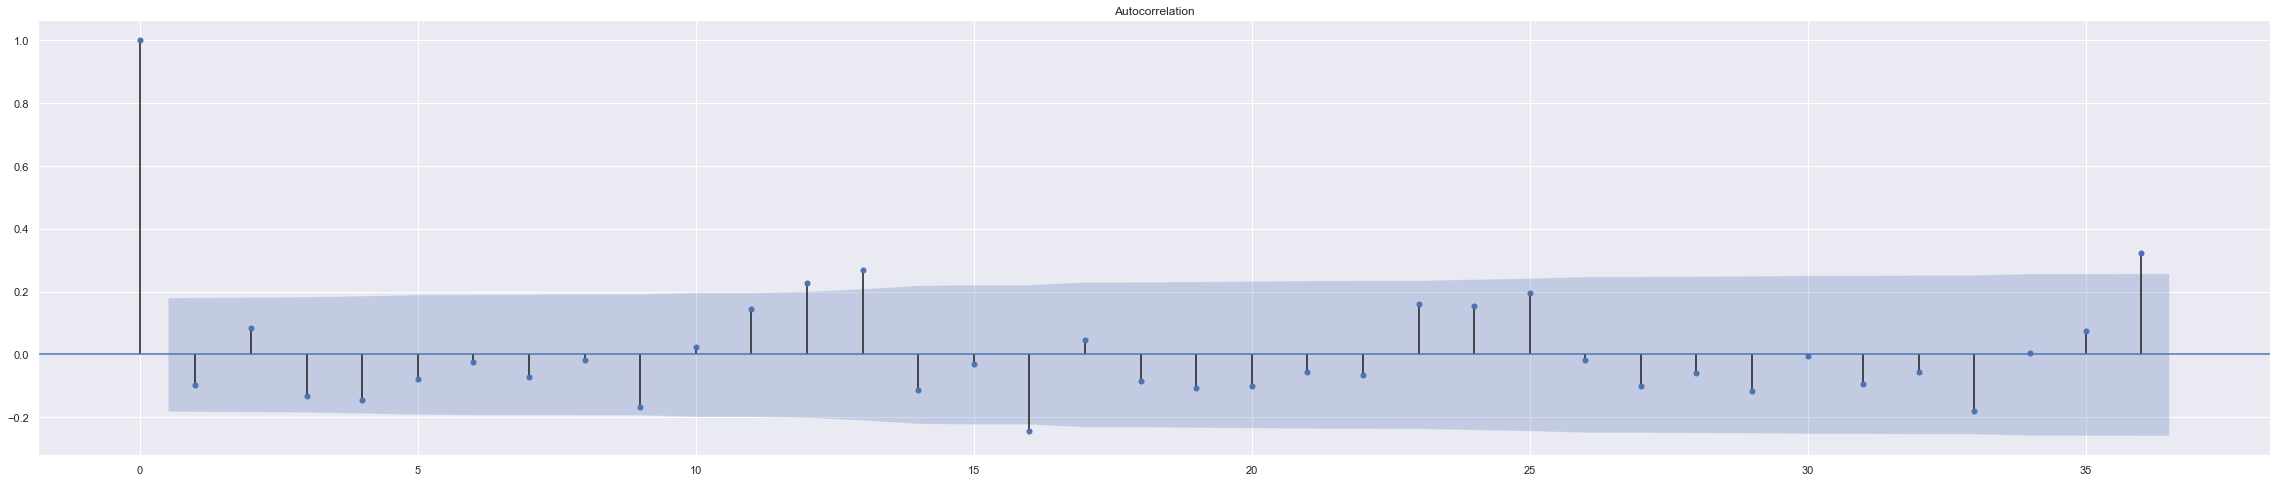

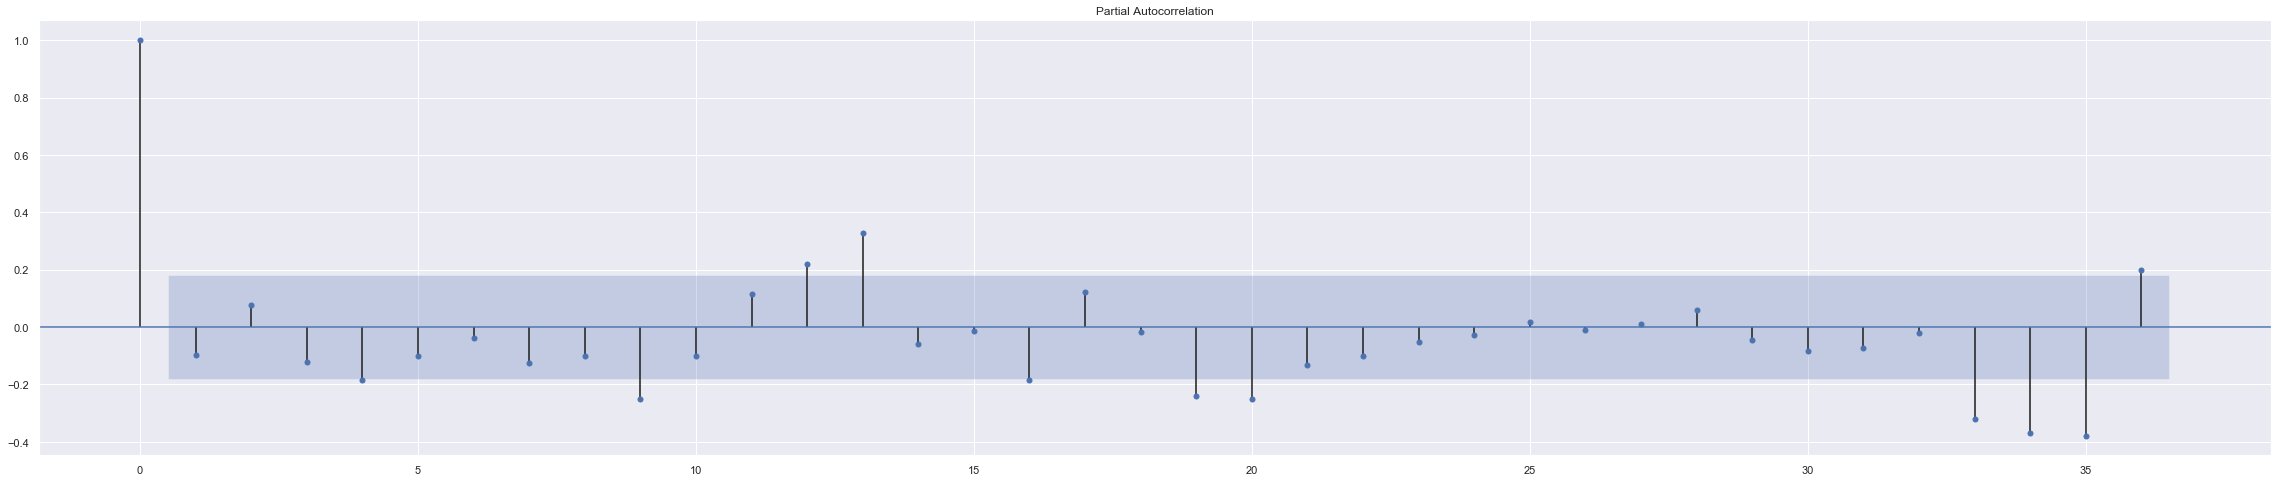

In [57]:
#plt.subplot(2, 1, 1)
plot_acf(df["Average Sale To List MoM"], lags=36)
plot_pacf(df["Average Sale To List MoM"], lags=36)

plt.show()

#### Unemployment Rates

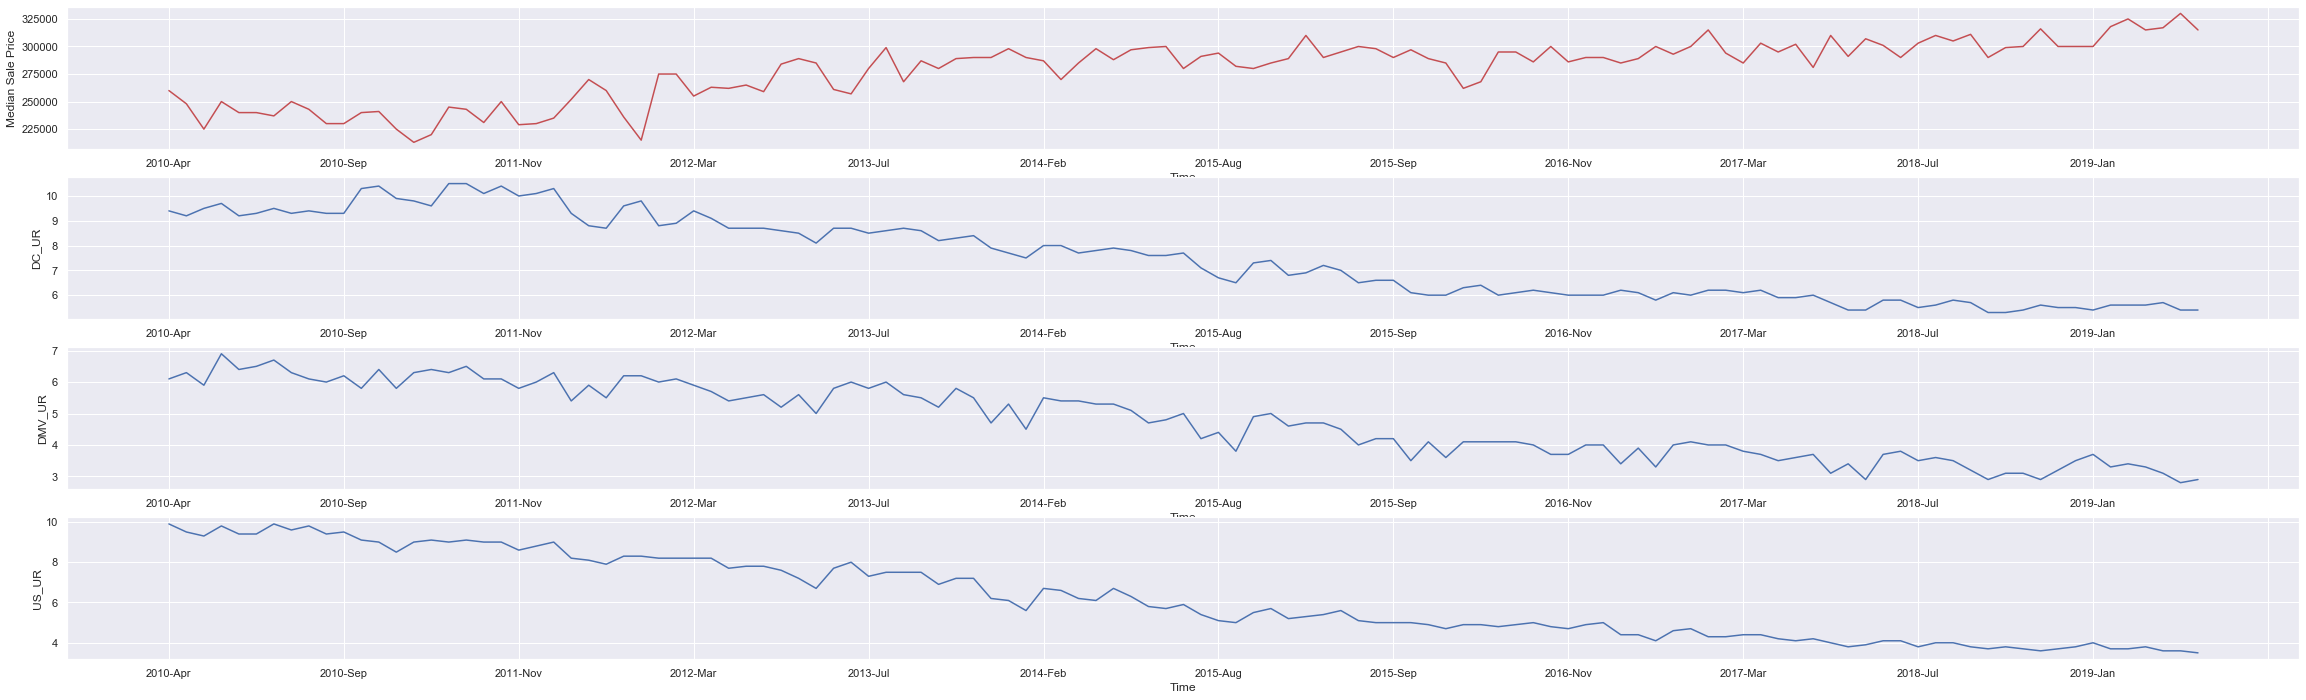

In [42]:
plt.subplot(4, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 2)
sns.lineplot(x = "Time", y = "DC_UR", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 3)
sns.lineplot(x = "Time", y = "DMV_UR", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 4)
sns.lineplot(x = "Time", y = "US_UR", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,18)})
plt.show()

Above -- This time we are looking at Unempolyment Rates (UR) in DC, in the greater DC, Maryland and Virginia area (DMV) and in the US to see if these might have any relationship with our DC Median Home Sale Pirce (red).

It appears that there might be an inverse relationship between these variables and our Median Sale Price.

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

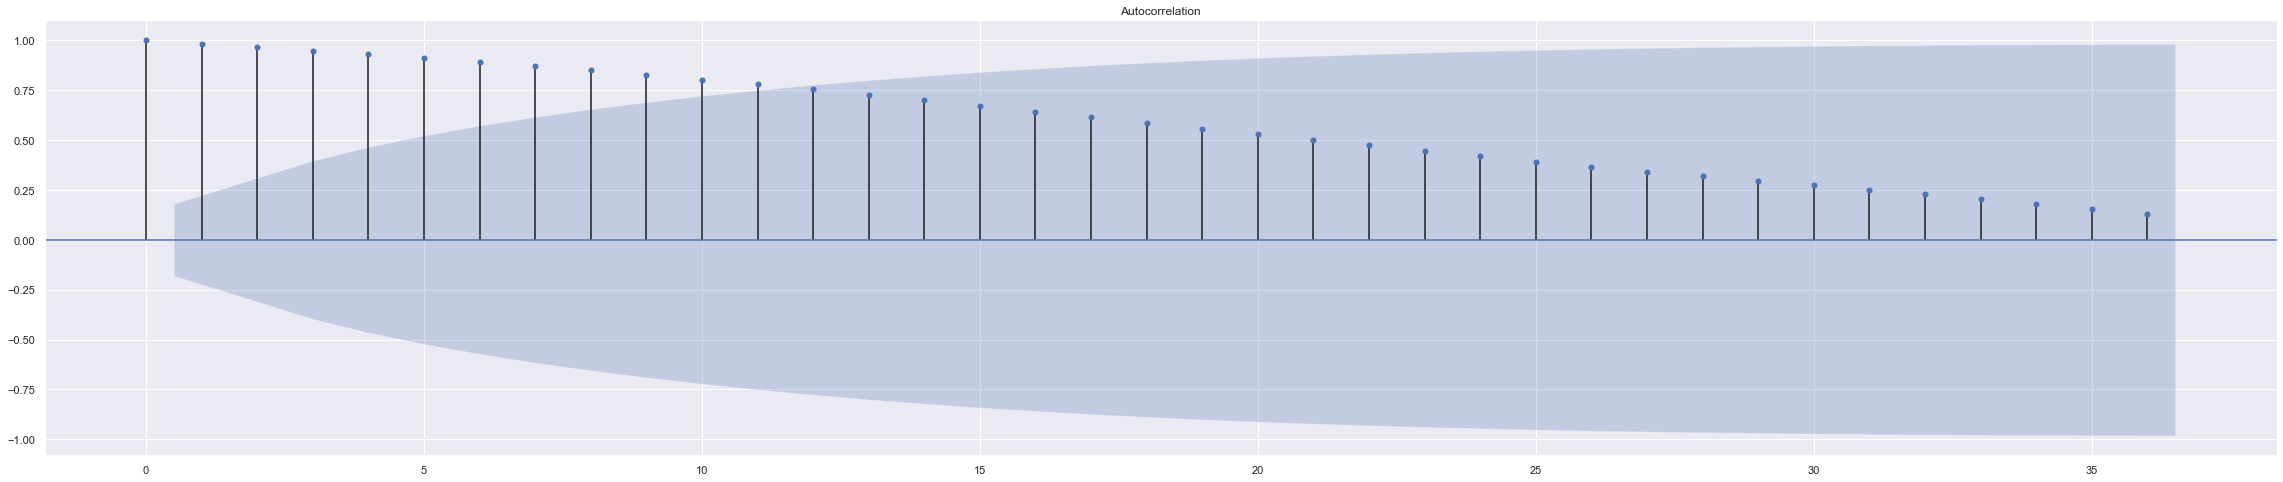

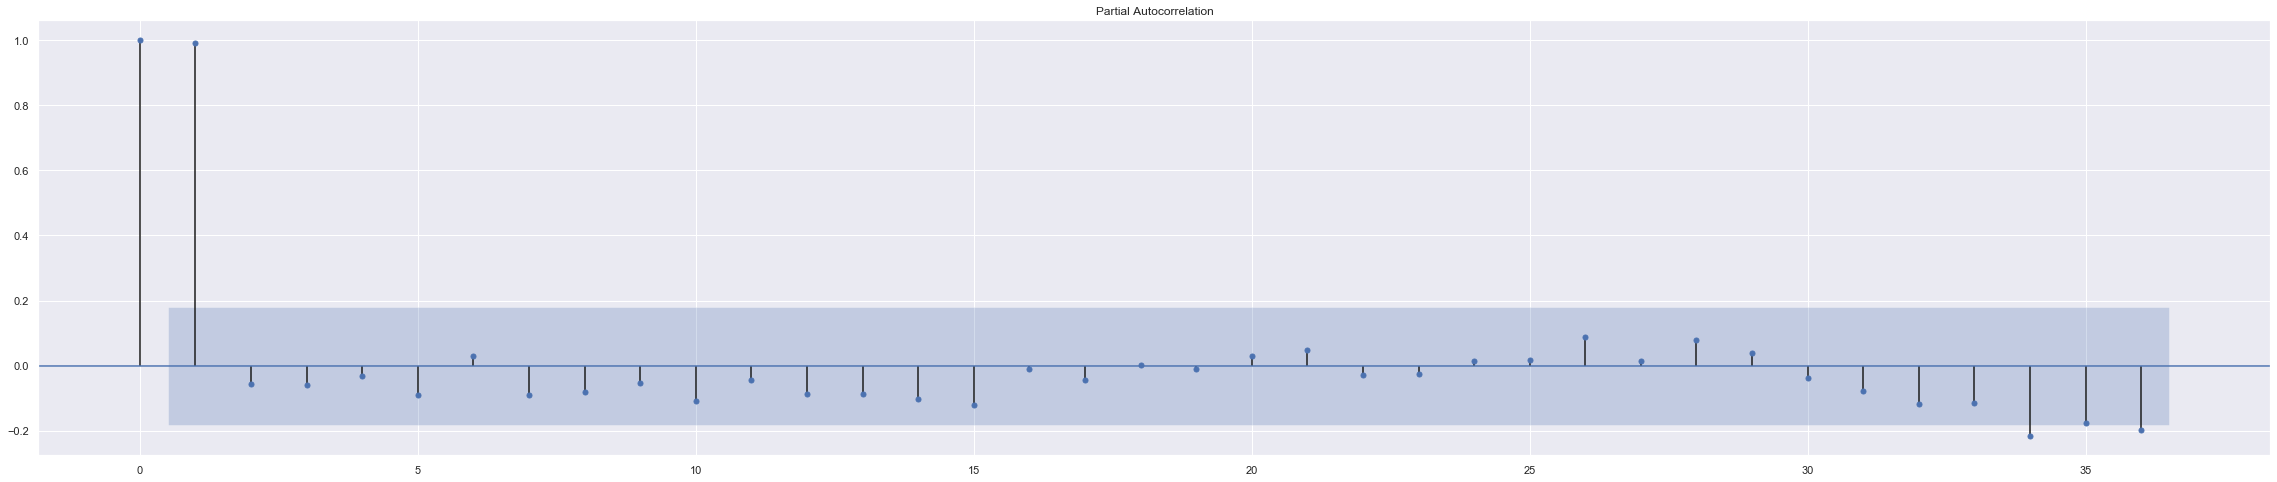

In [58]:
#plt.subplot(2, 1, 1)
plot_acf(df["DC_UR"], lags=36)
plot_pacf(df["DC_UR"], lags=36)

plt.show()

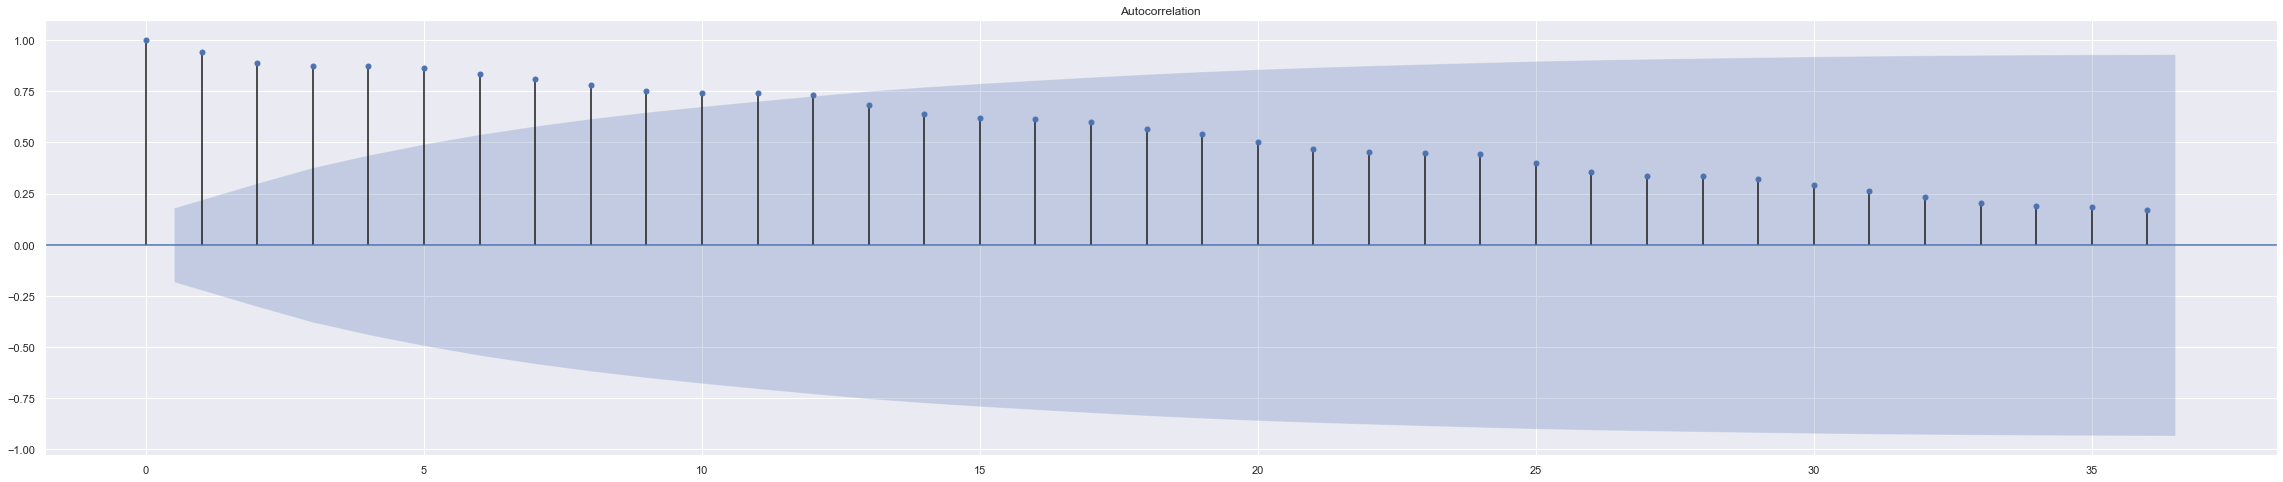

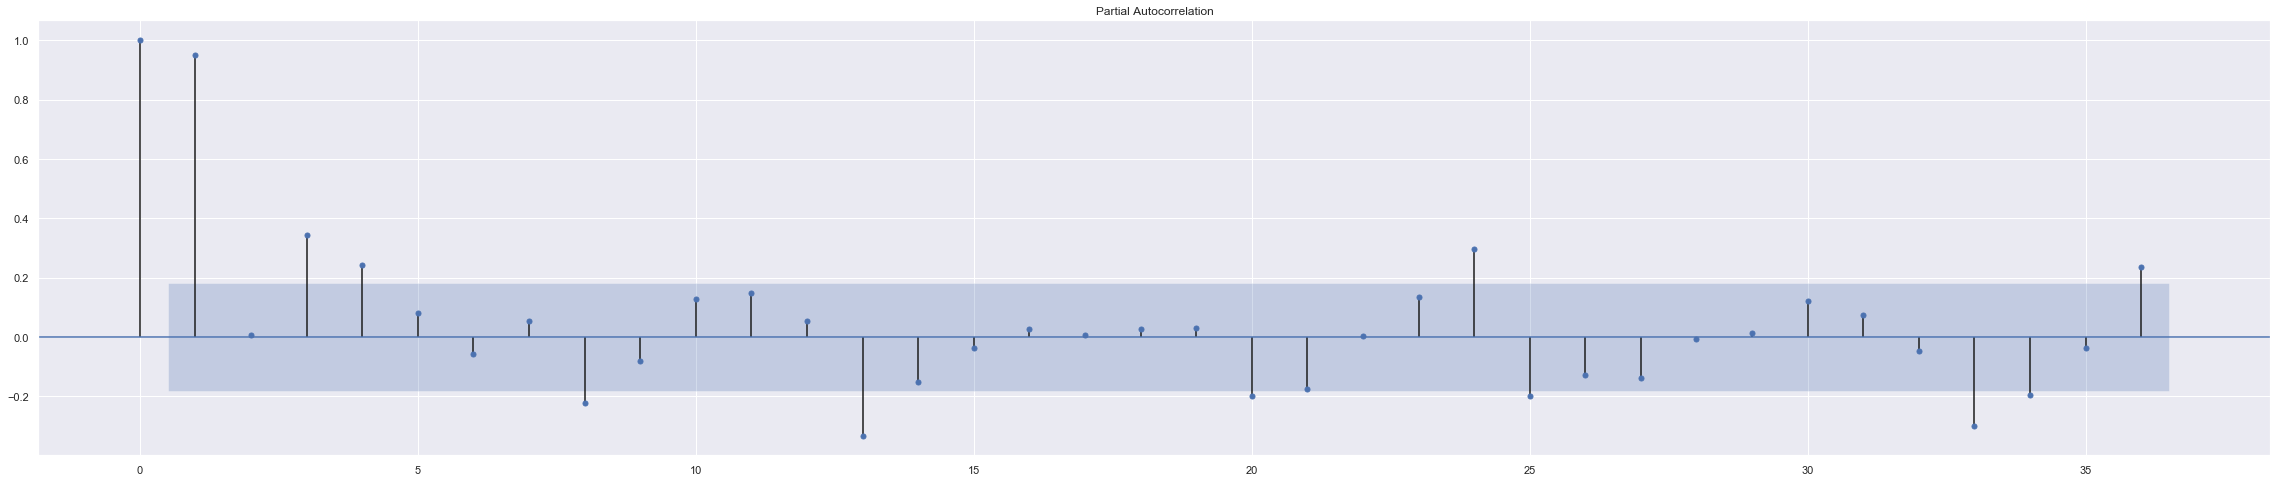

In [59]:
#plt.subplot(2, 1, 1)
plot_acf(df["DMV_UR"], lags=36)
plot_pacf(df["DMV_UR"], lags=36)

plt.show()

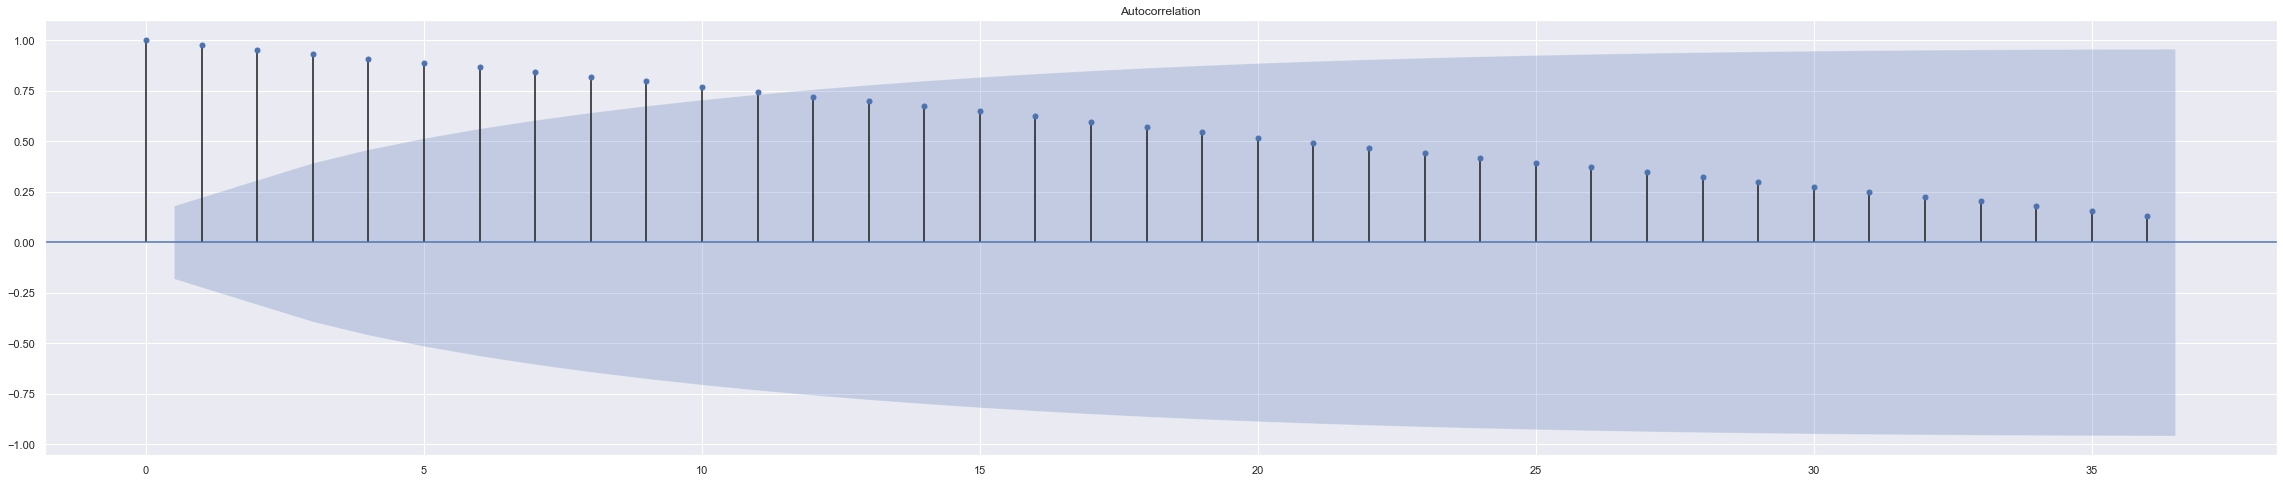

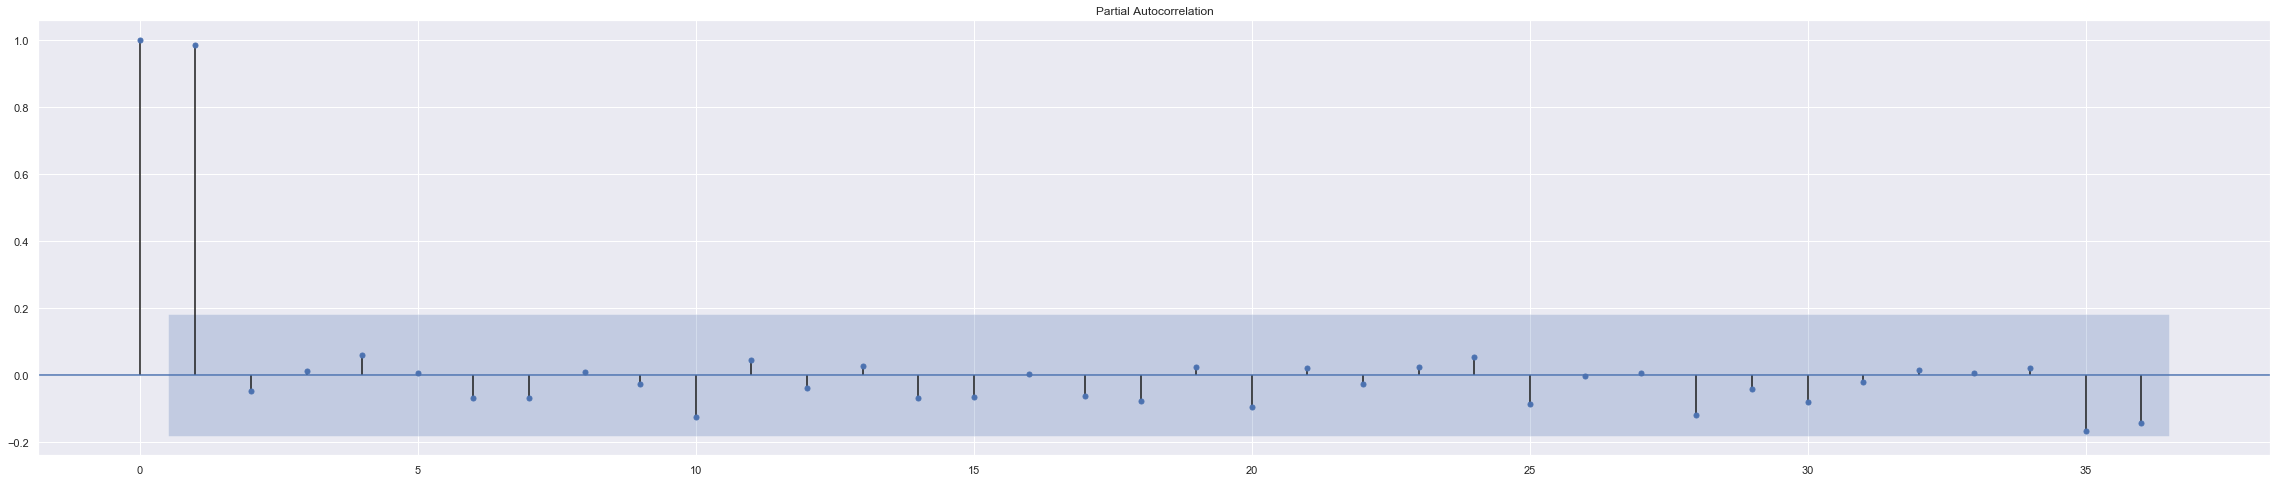

In [60]:
#plt.subplot(2, 1, 1)
plot_acf(df["US_UR"], lags=36)
plot_pacf(df["US_UR"], lags=36)

plt.show()

 #### Numbers of Employees in Various Market Sectors

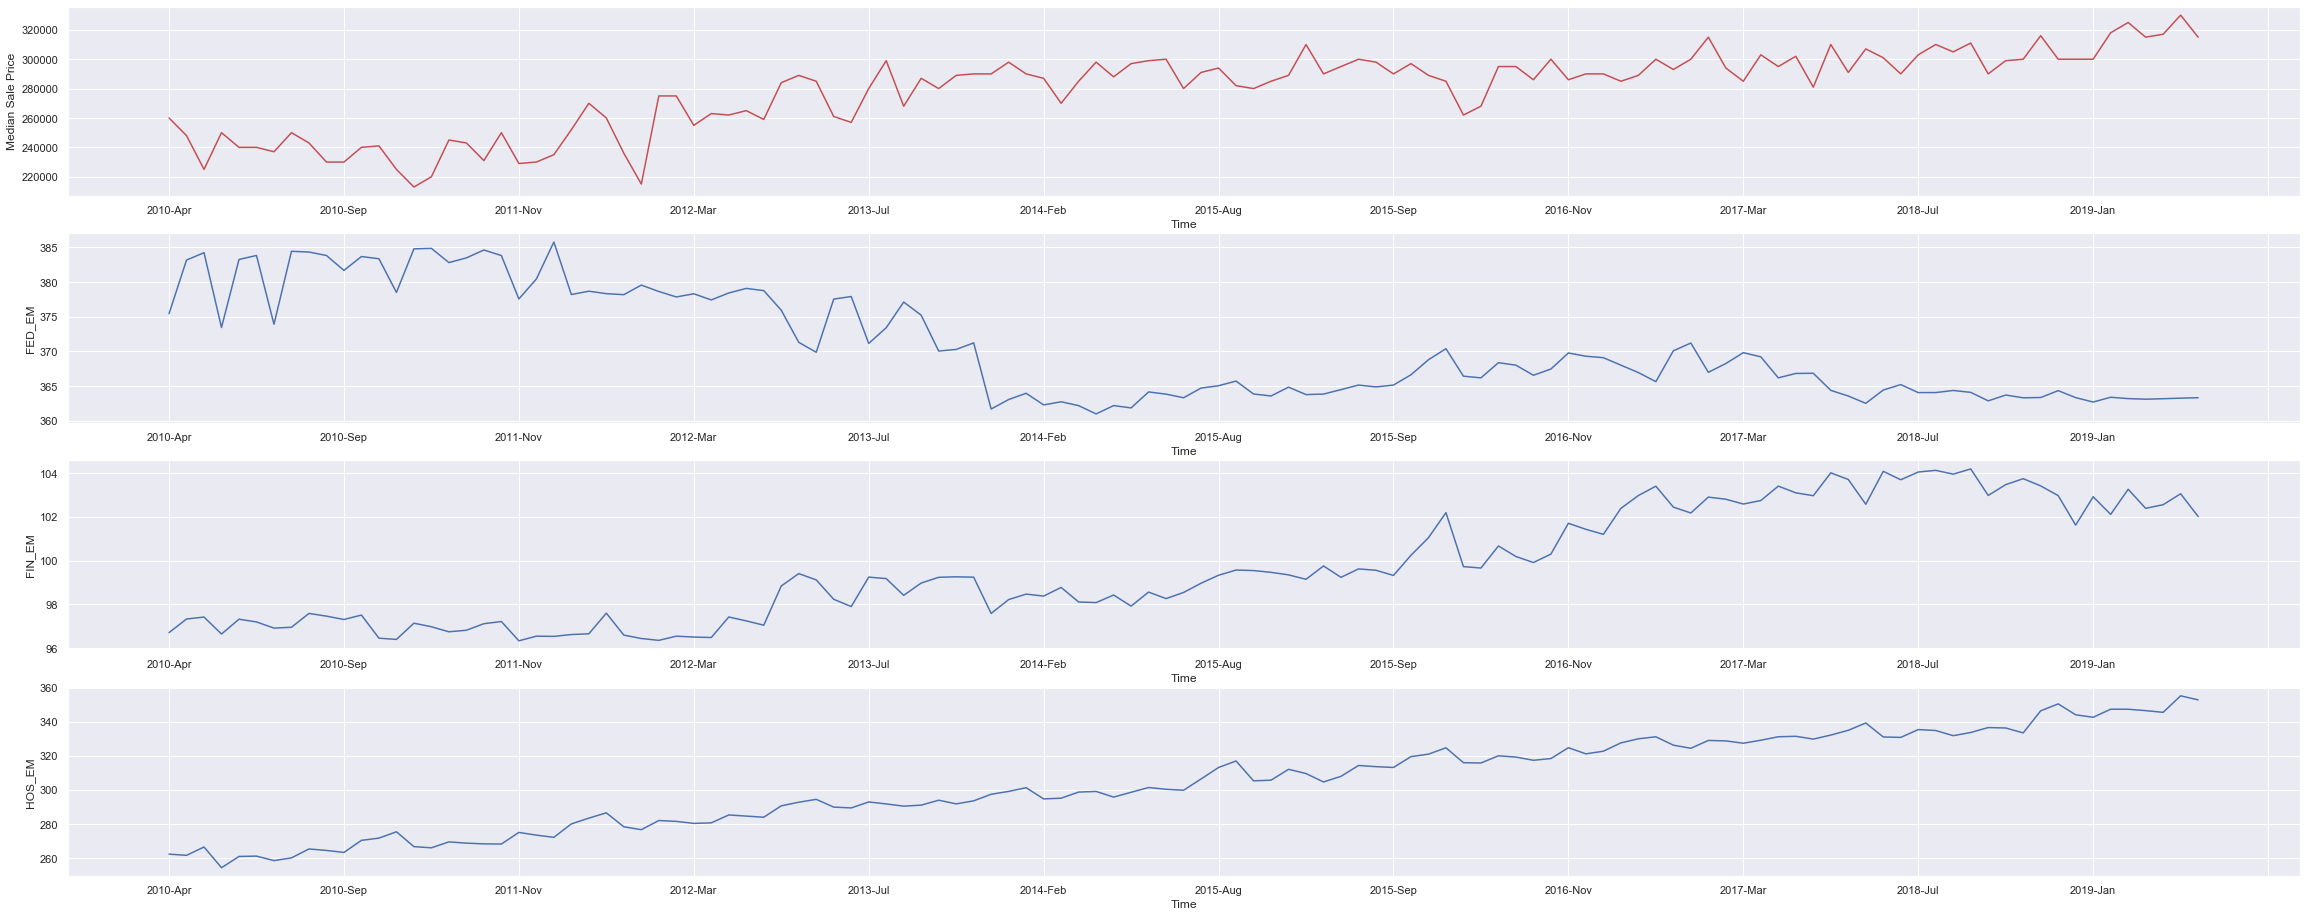

In [31]:
plt.subplot(4, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 2)
sns.lineplot(x = "Time", y = "FED_EM", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 3)
sns.lineplot(x = "Time", y = "FIN_EM", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 4)
sns.lineplot(x = "Time", y = "HOS_EM", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,18)})
plt.show()

Above -- This time we are looking at the number of DMV empolyees in different sectors: the federal governement, finance, and hospitality, to see if these might any relationship with our DC Median Home Sale Pirce (red).

In general it appears that there is a relationship between the number of employees and our Median Sale Price. Except in the case of federal employees, we will need to look into thid further, to see why that might be?

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

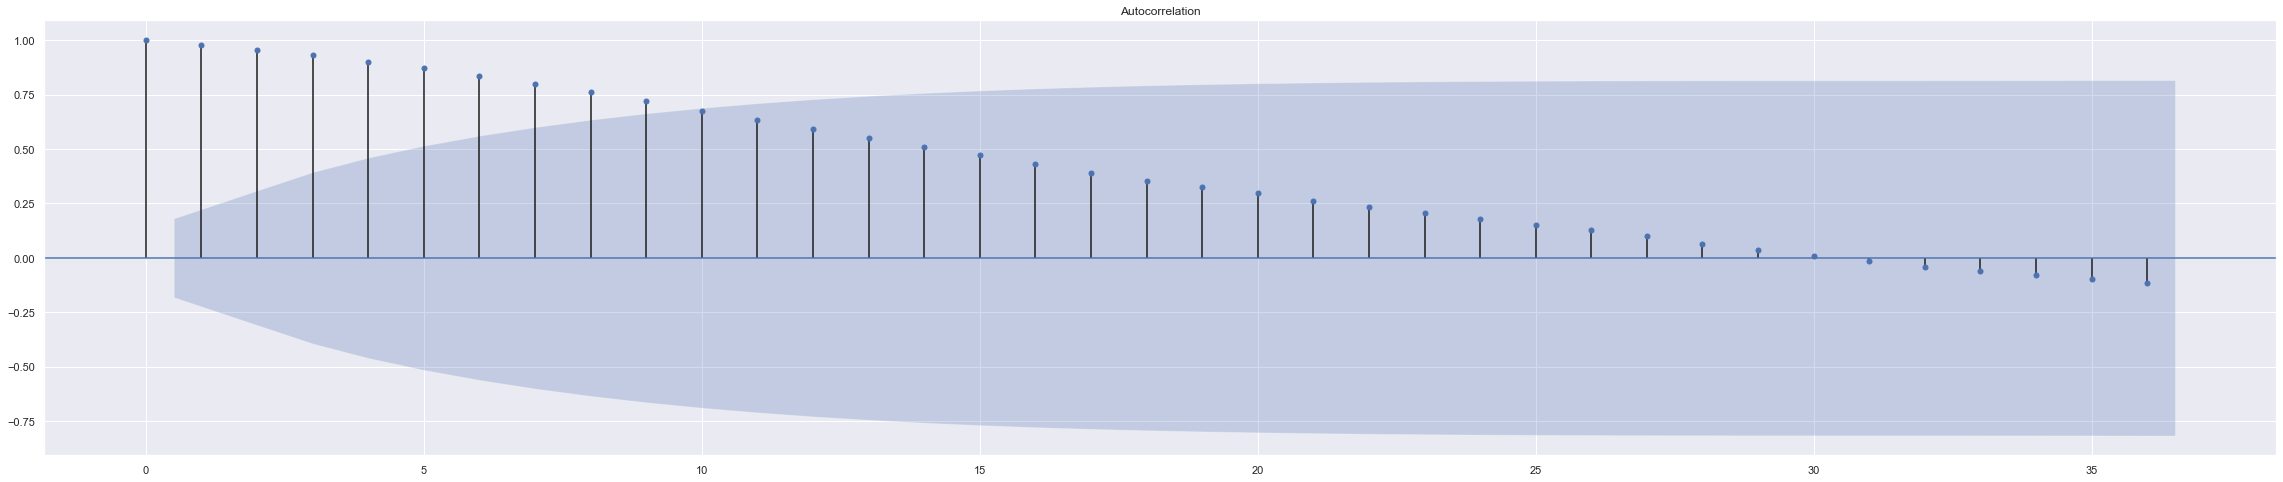

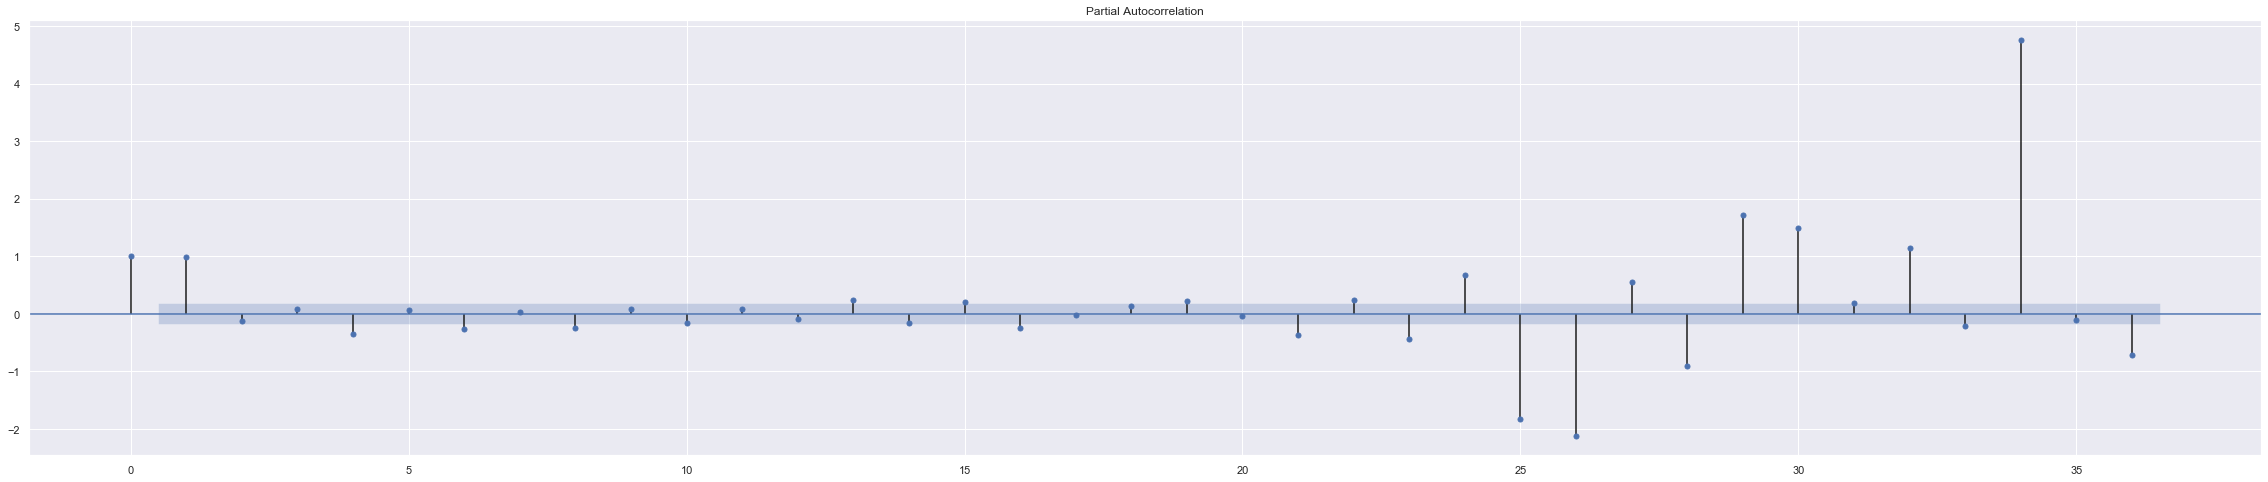

In [61]:
#plt.subplot(2, 1, 1)
plot_acf(df["FED_EM"], lags=36)
plot_pacf(df["FED_EM"], lags=36)

plt.show()

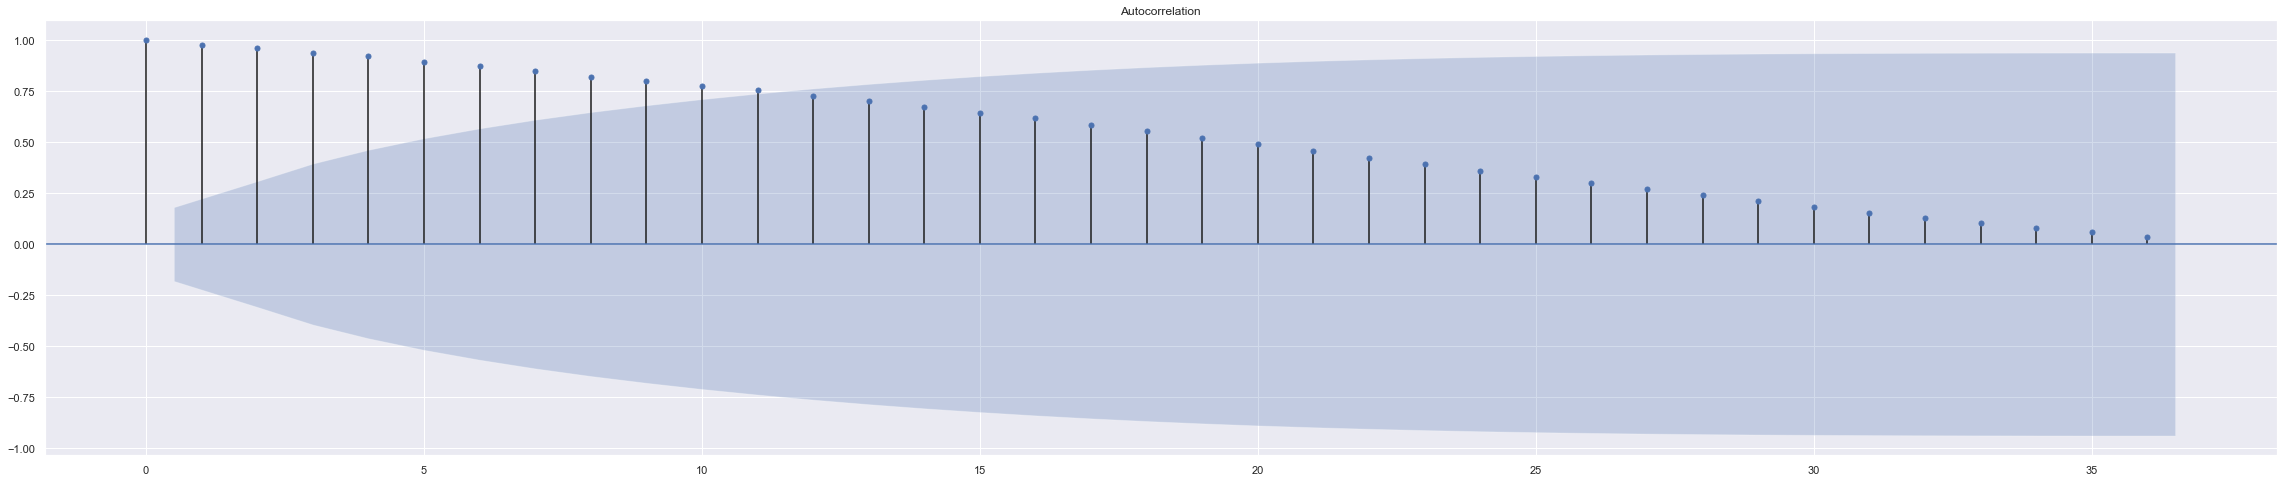

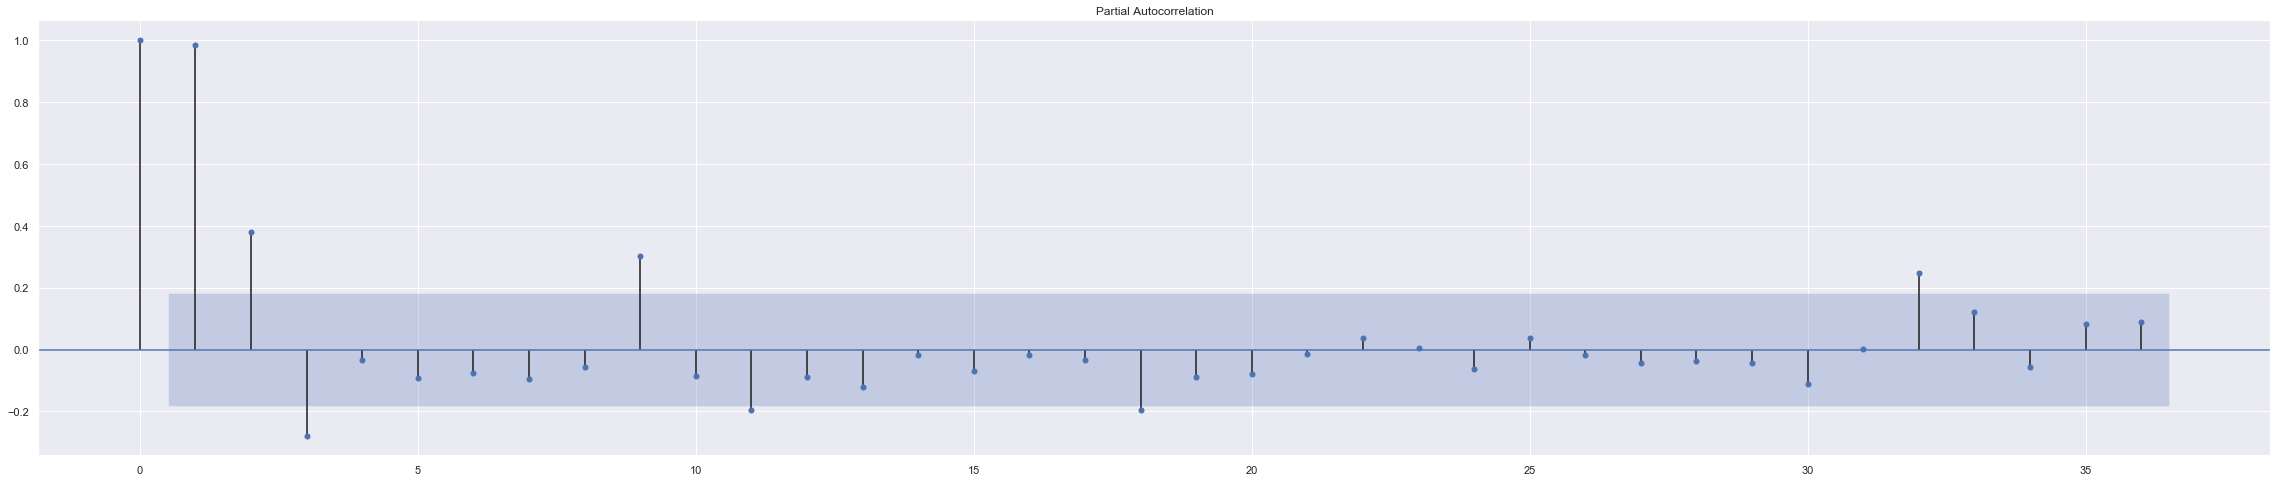

In [62]:
#plt.subplot(2, 1, 1)
plot_acf(df["FIN_EM"], lags=36)
plot_pacf(df["FIN_EM"], lags=36)

plt.show()

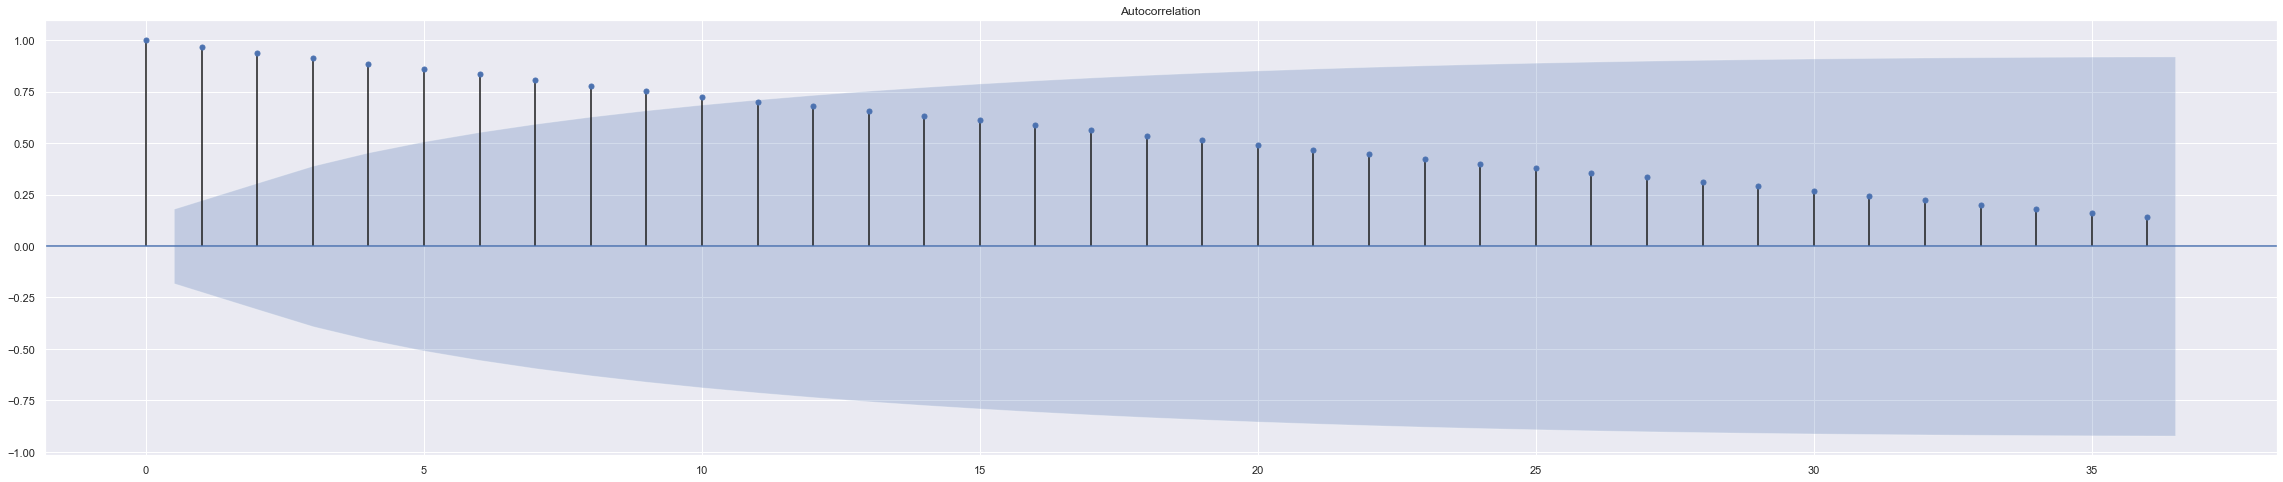

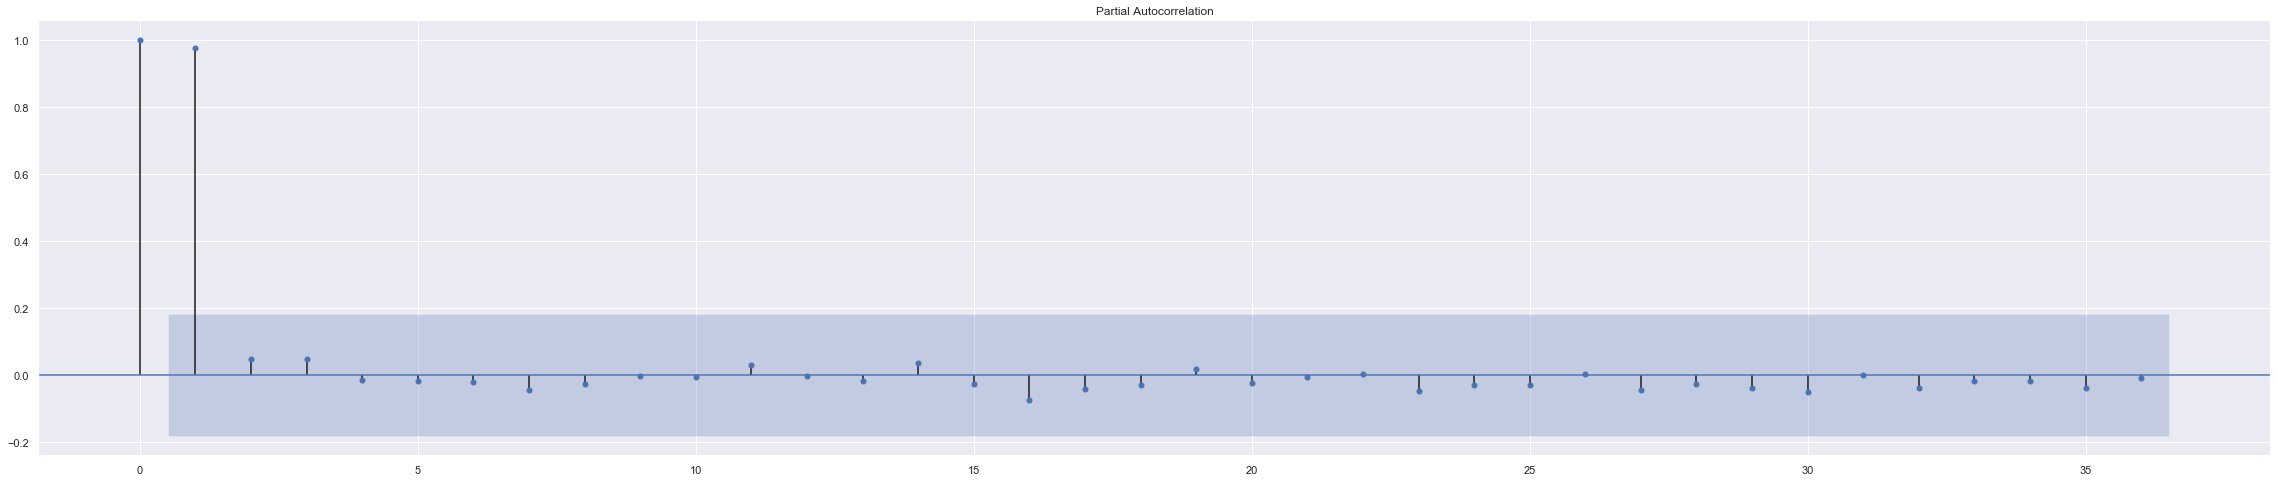

In [63]:
#plt.subplot(2, 1, 1)
plot_acf(df["HOS_EM"], lags=36)
plot_pacf(df["HOS_EM"], lags=36)

plt.show()

#### New Building Permits

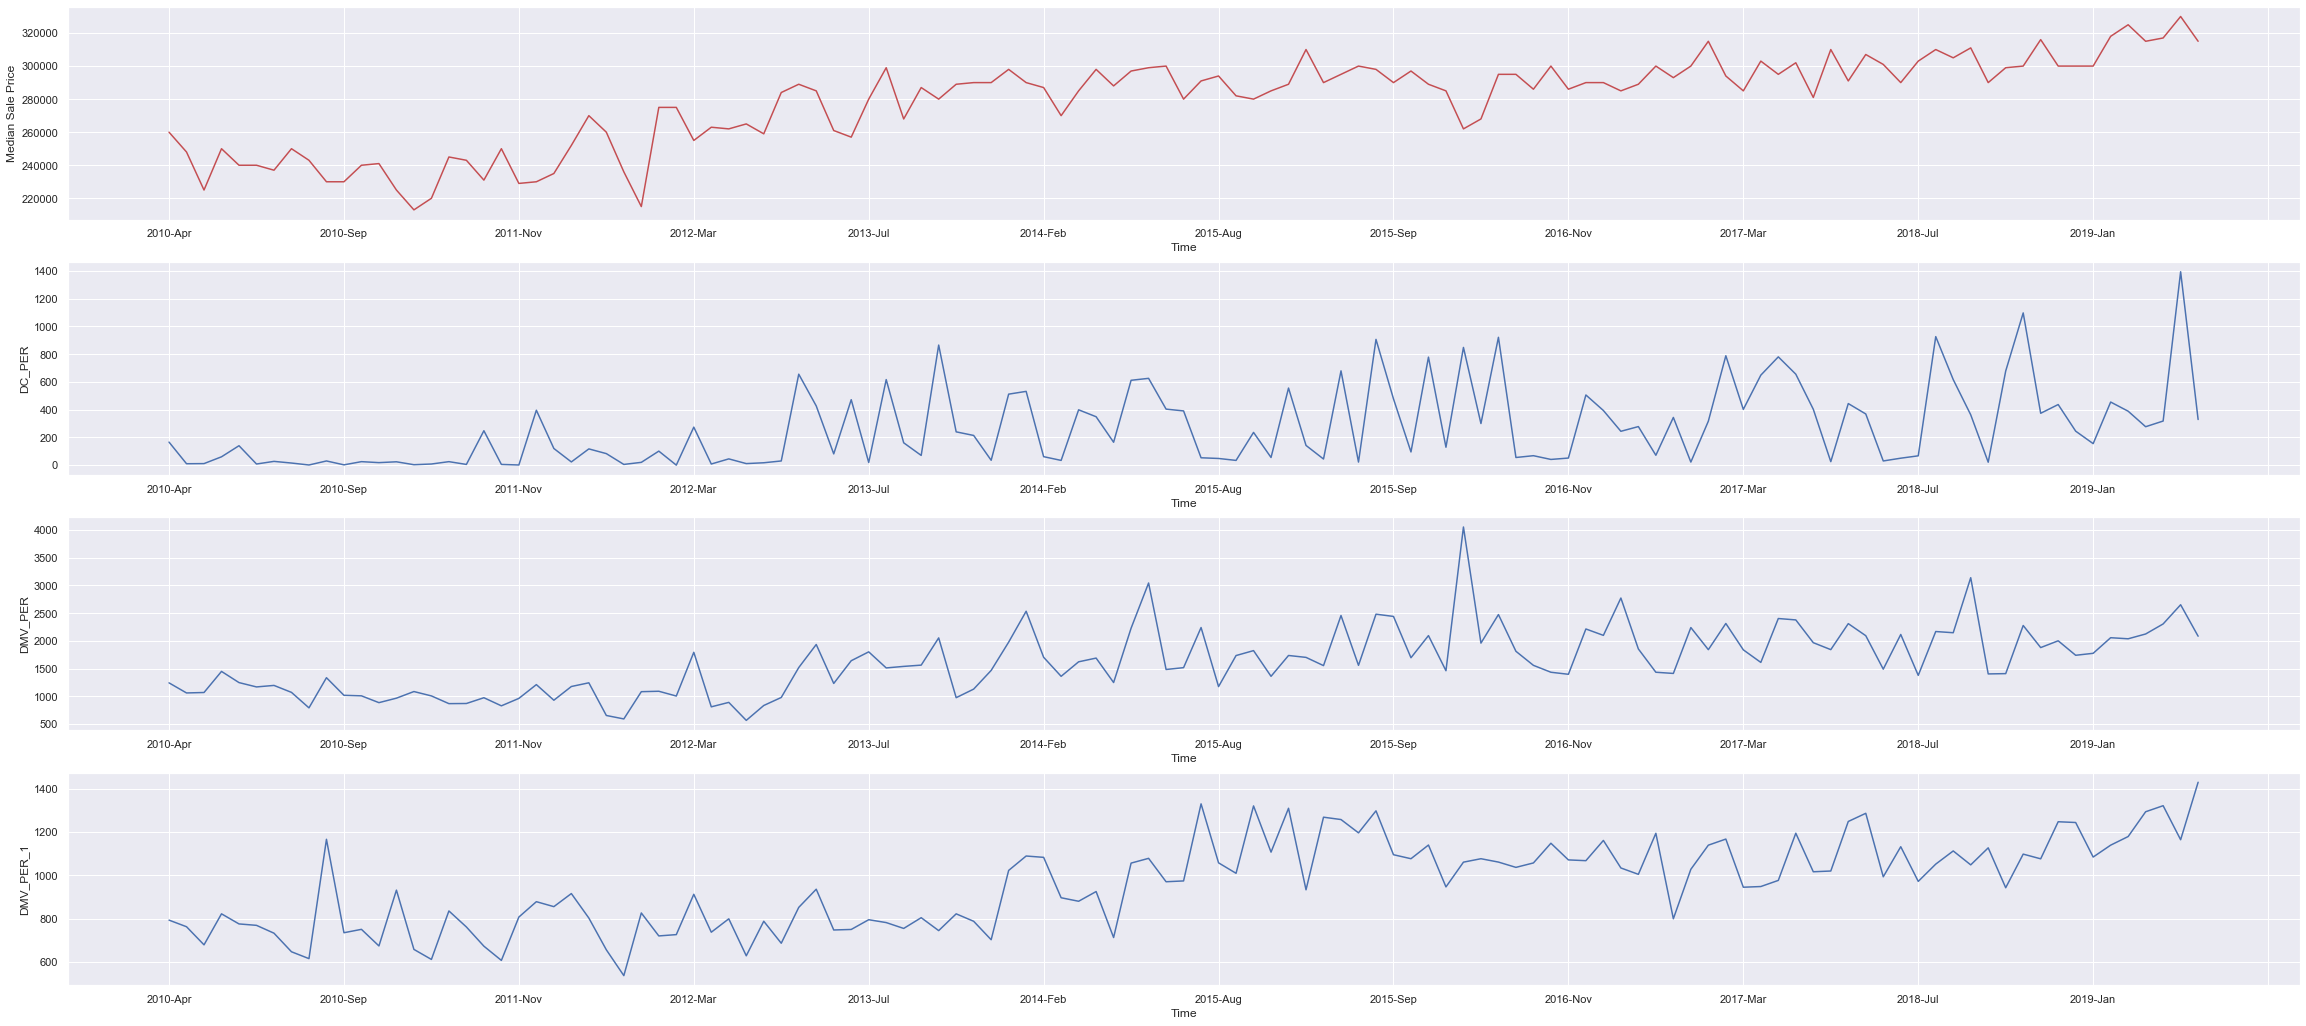

In [28]:
plt.subplot(4, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 2)
sns.lineplot(x = "Time", y = "DC_PER", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 3)
sns.lineplot(x = "Time", y = "DMV_PER", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(4, 1, 4)
sns.lineplot(x = "Time", y = "DMV_PER_1", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,10)})
plt.show()

Above -- This time we are looking at the number of new permits to build in DC, in the DMV and then specifically permits for one unit structures in the DMV to see if these have any relationship with our DC Median Home Sale Pirce (red). We have adjusted the permit time scale by 2 years in order to roughly account for the time it would take to build these structures and have them available on the market. 

There seems to be an upward trend for DMV one unit structure permits that correlates quite nicely with our our Median Sale Price. General DMV building permits also seem to coorelate, while DC specific permits appear more volitle since the overall values (number of permits) are lower, so futher investigation is needed here. 

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

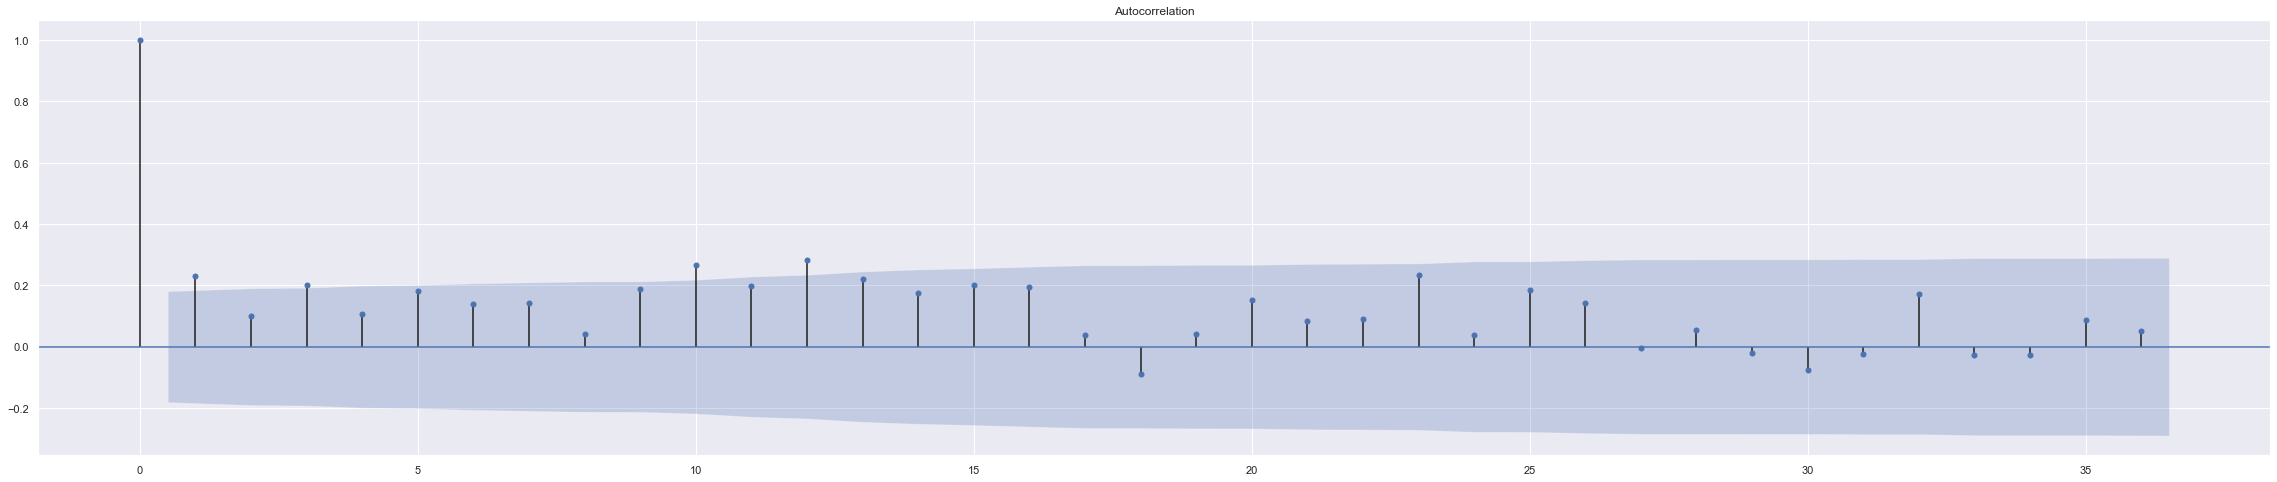

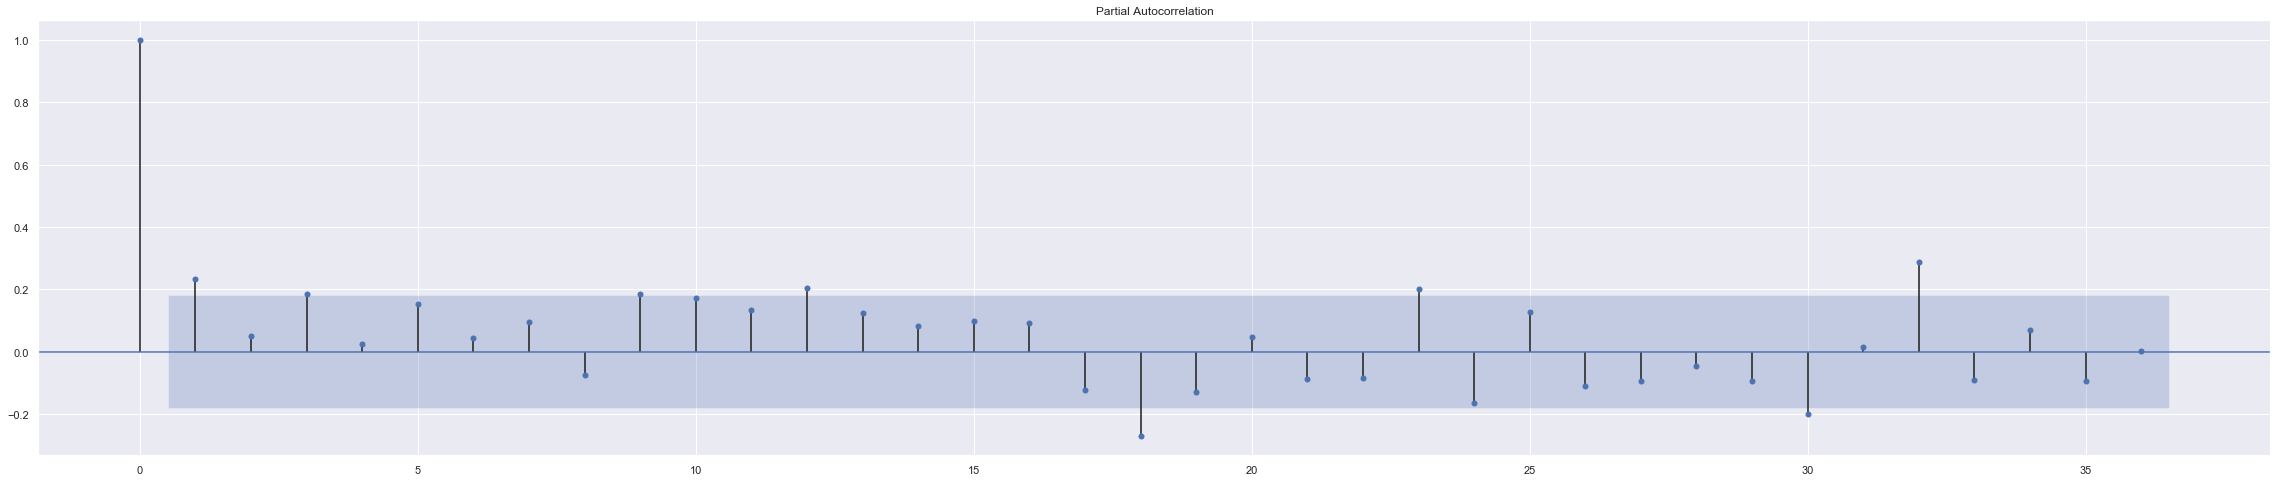

In [64]:
#plt.subplot(2, 1, 1)
plot_acf(df["DC_PER"], lags=36)
plot_pacf(df["DC_PER"], lags=36)

plt.show()

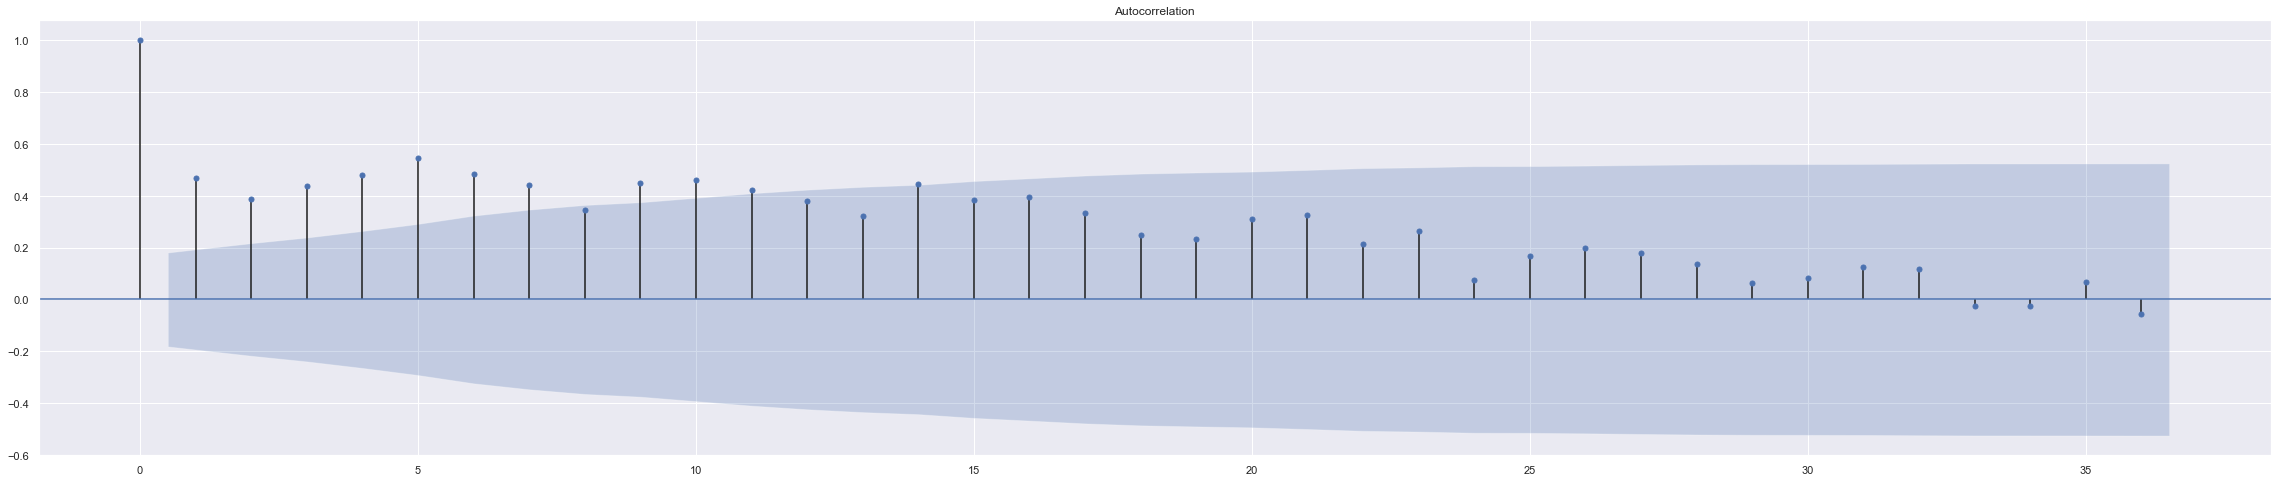

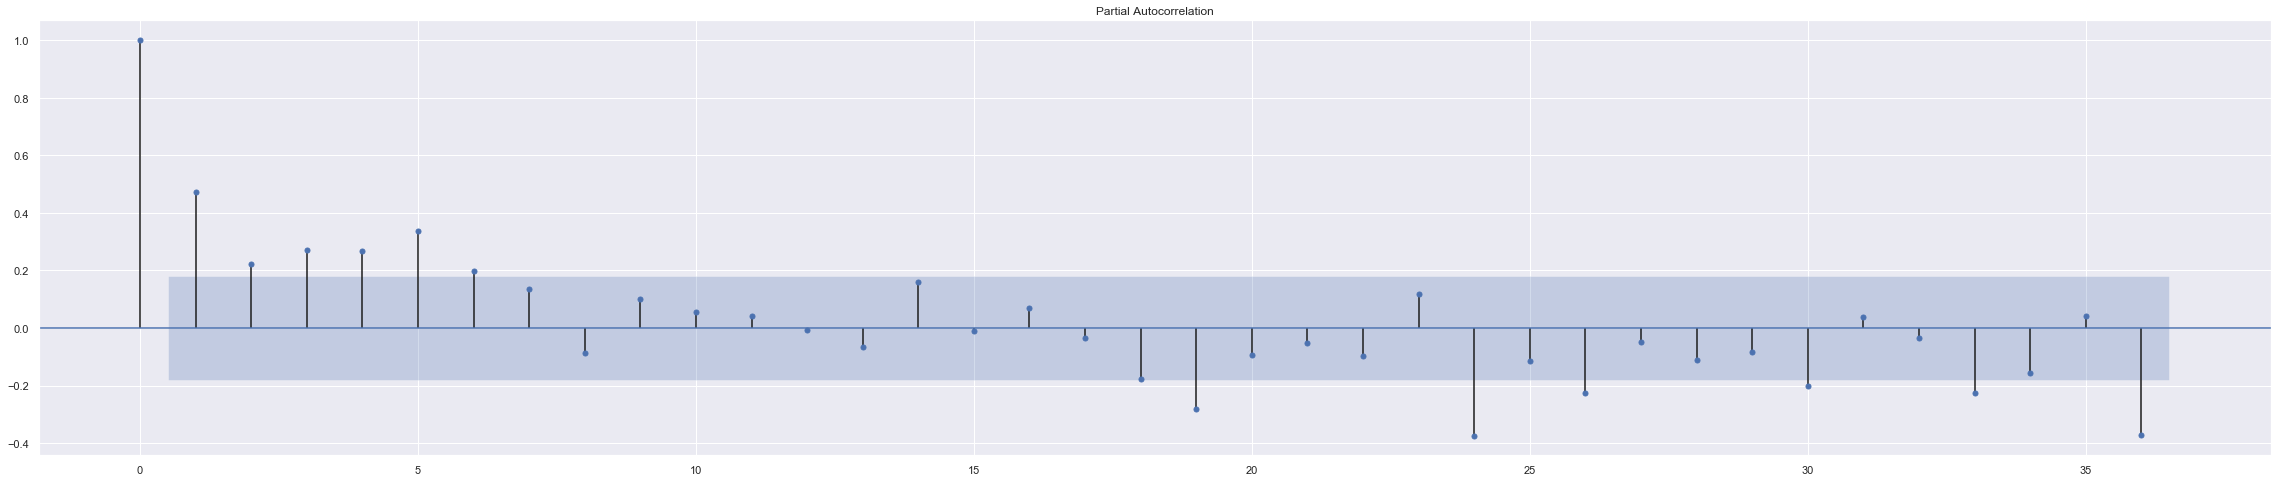

In [65]:
#plt.subplot(2, 1, 1)
plot_acf(df["DMV_PER"], lags=36)
plot_pacf(df["DMV_PER"], lags=36)

plt.show()

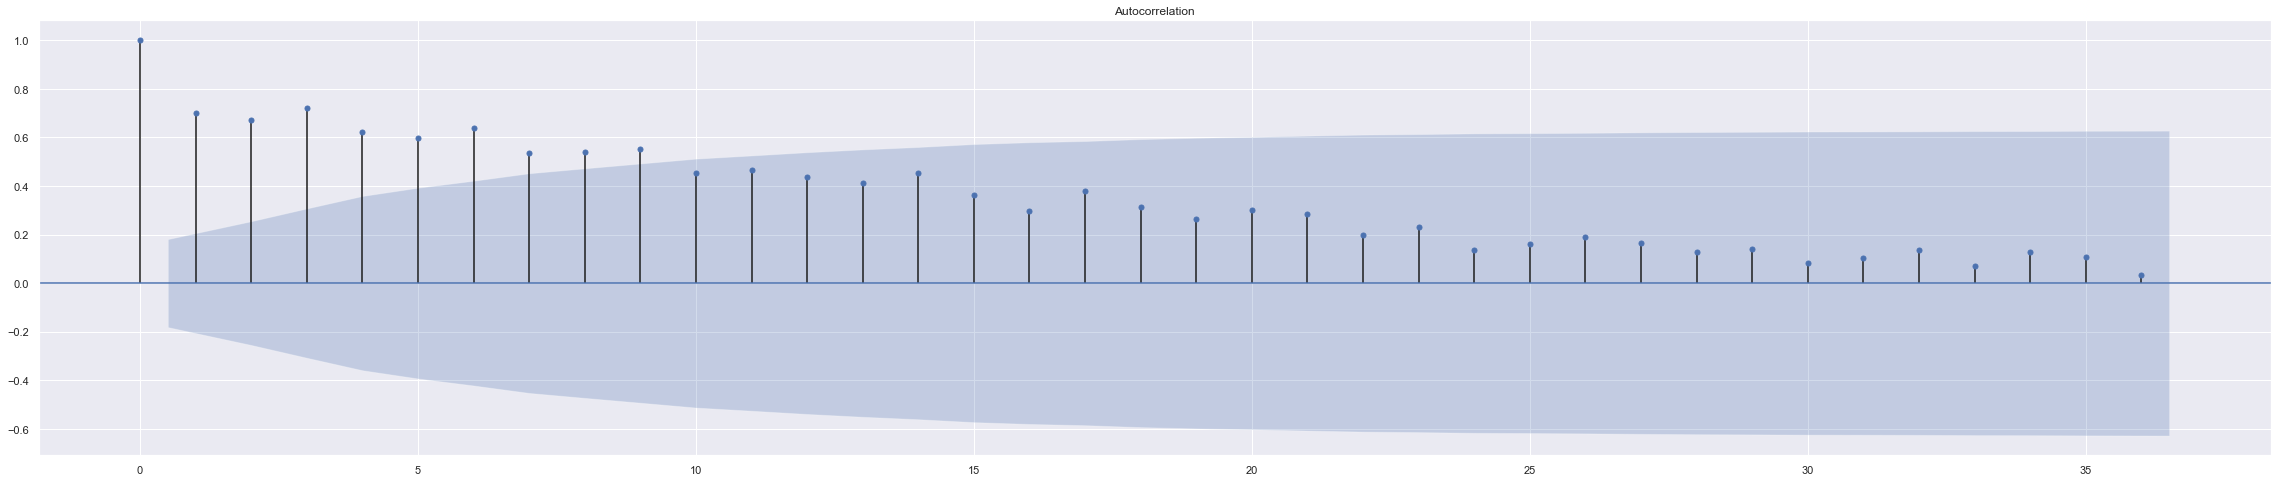

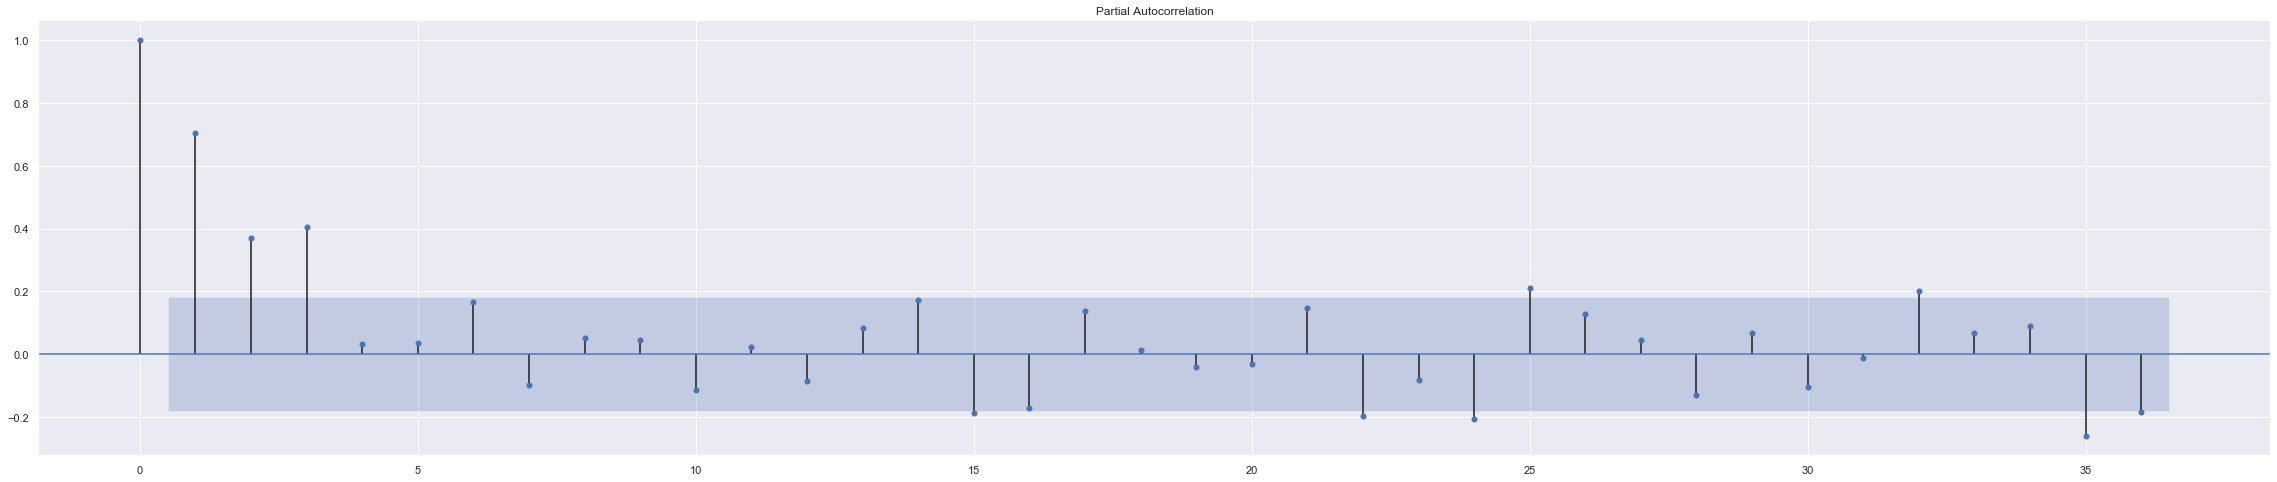

In [66]:
#plt.subplot(2, 1, 1)
plot_acf(df["DMV_PER_1"], lags=36)
plot_pacf(df["DMV_PER_1"], lags=36)

plt.show()

#### S&P - Home Price Index

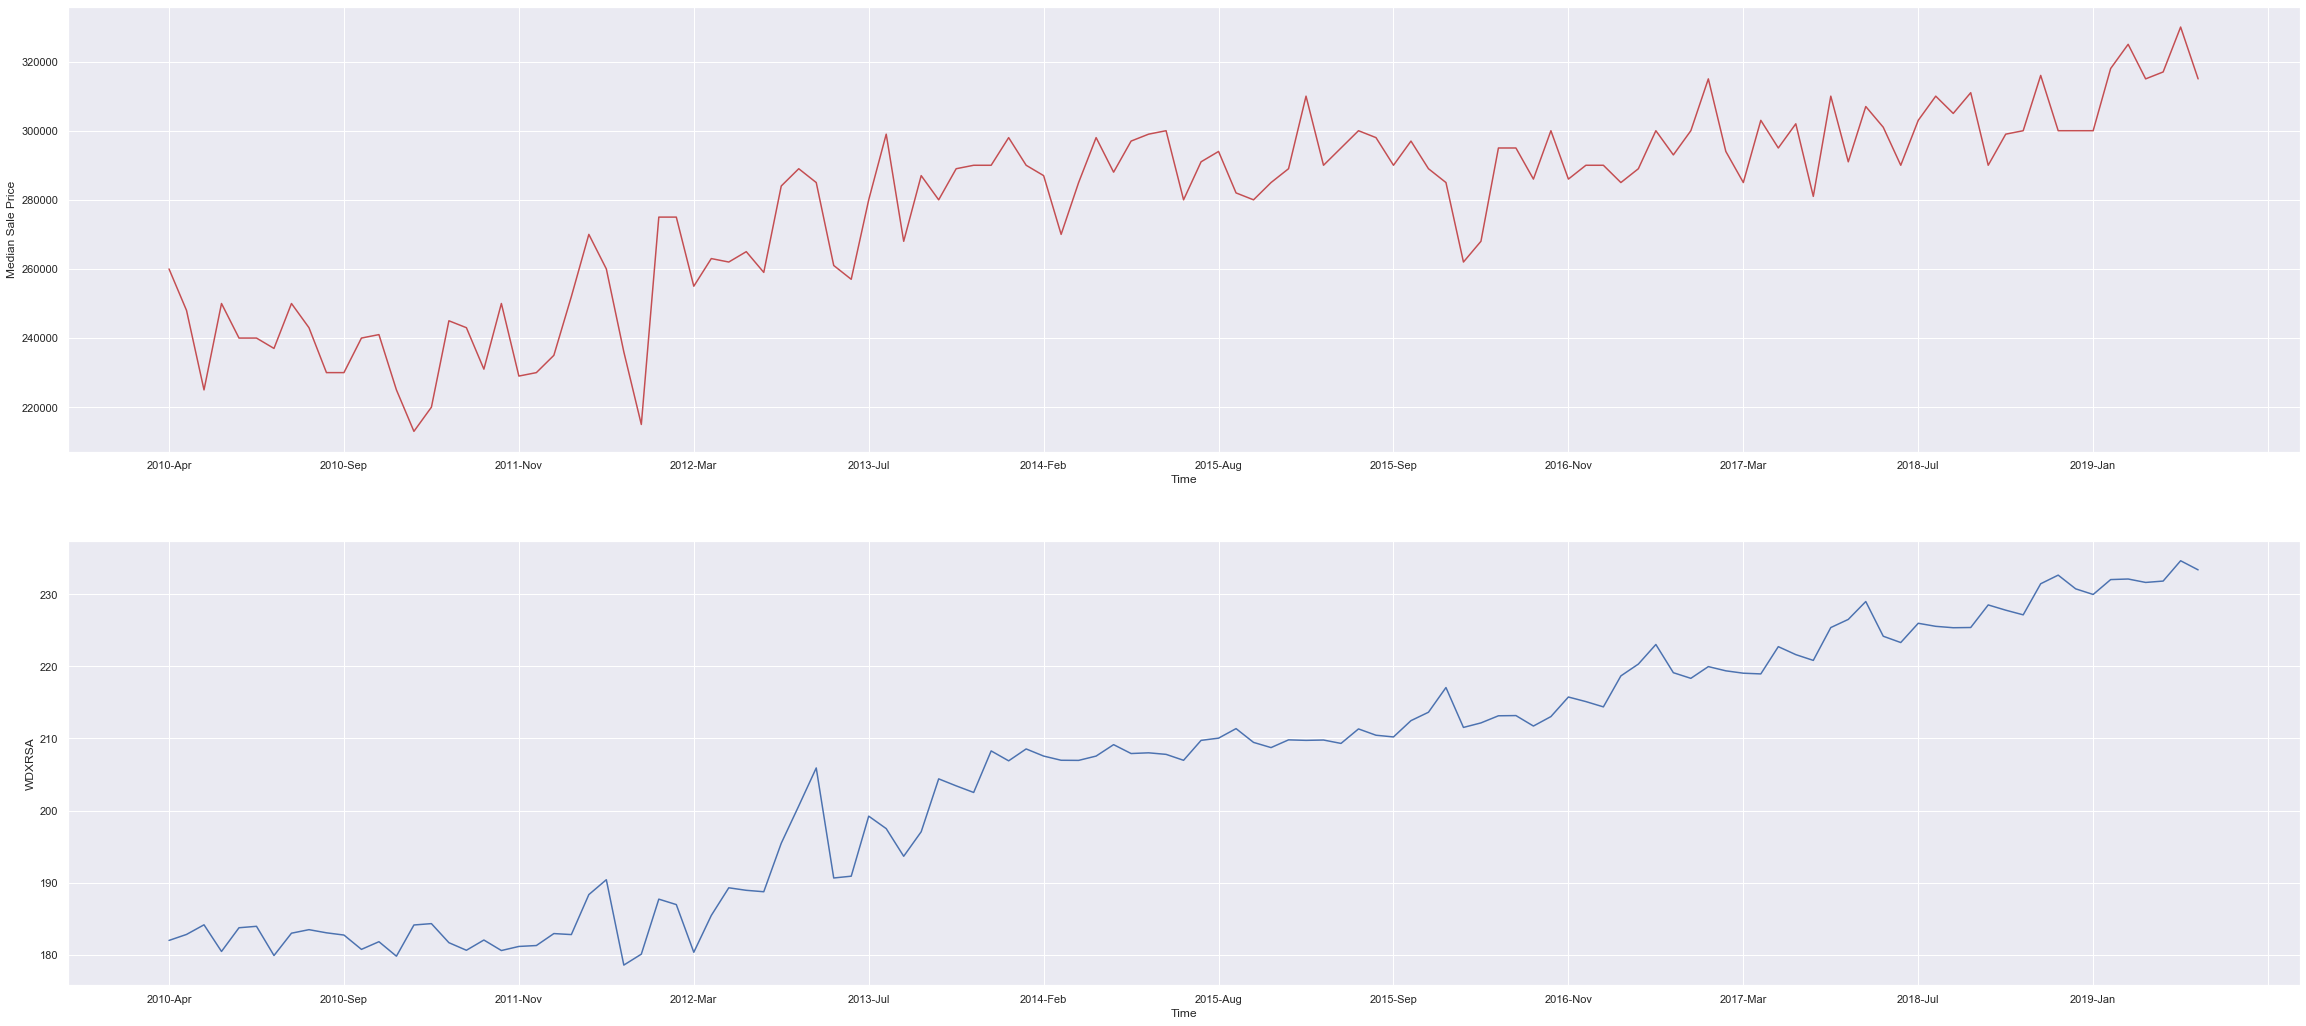

In [43]:
plt.subplot(2, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(2, 1, 2)
sns.lineplot(x = "Time", y = "WDXRSA", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,8)})
plt.show()

Above -- This time we are looking to see if there might be an affect from the overall US housing market by looking at the S&P Home Price Index and our DC Median Home Sale Pirce (red). 

Visually, there does seem to be quite a similar trend here, with even the peaks and valleys roughly correlating. 

Below -- Let's check if this is time series data by plotting both an autocorrelation and partial autocorrelation

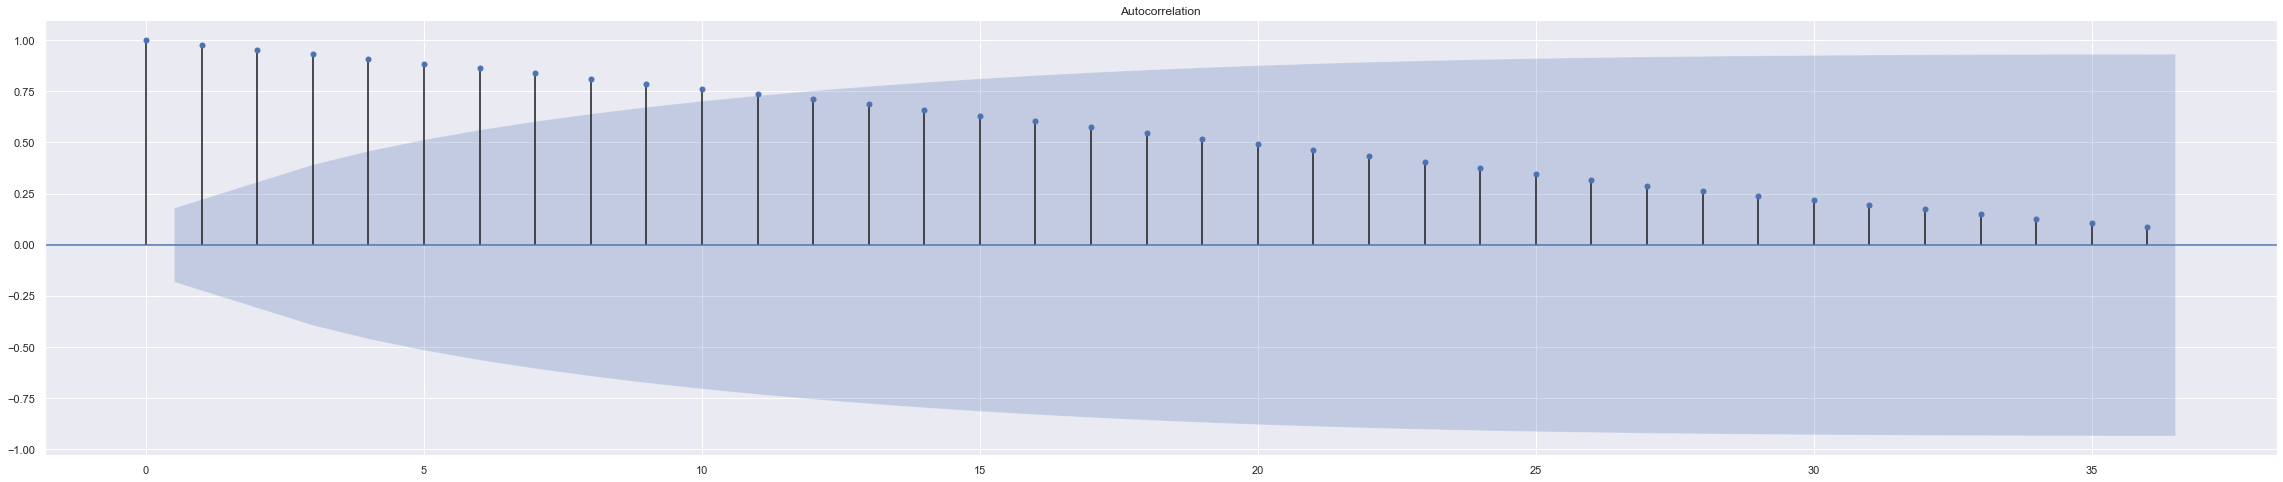

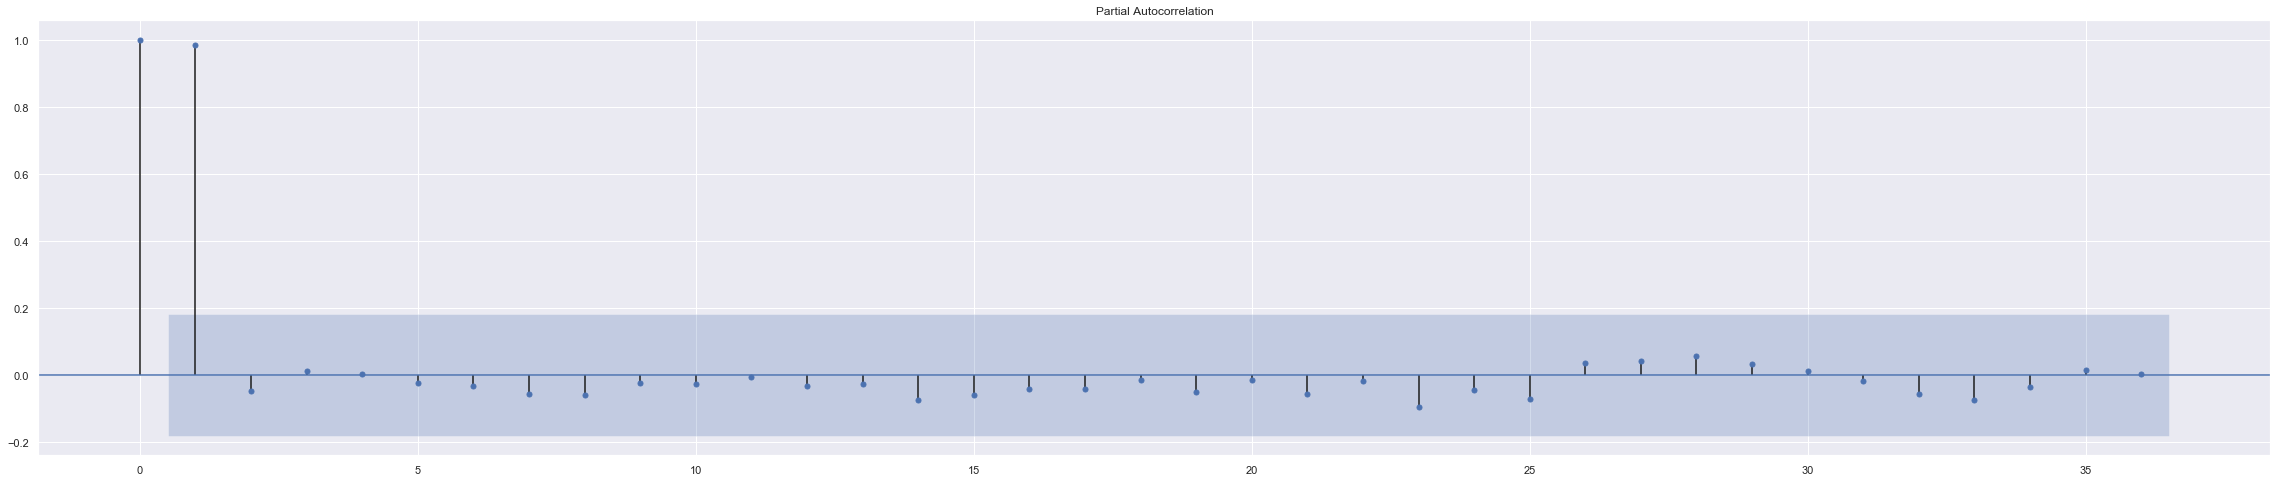

In [67]:
#plt.subplot(2, 1, 1)
plot_acf(df["WDXRSA"], lags=36)
plot_pacf(df["WDXRSA"], lags=36)

plt.show()